In [1]:
import numpy as np
import matplotlib.pyplot as plt

from plt_fit import *

In [2]:
con = np.load('phi_cmc/conv.npy')
t_con = np.load('phi_cmc/t_conv.npy')

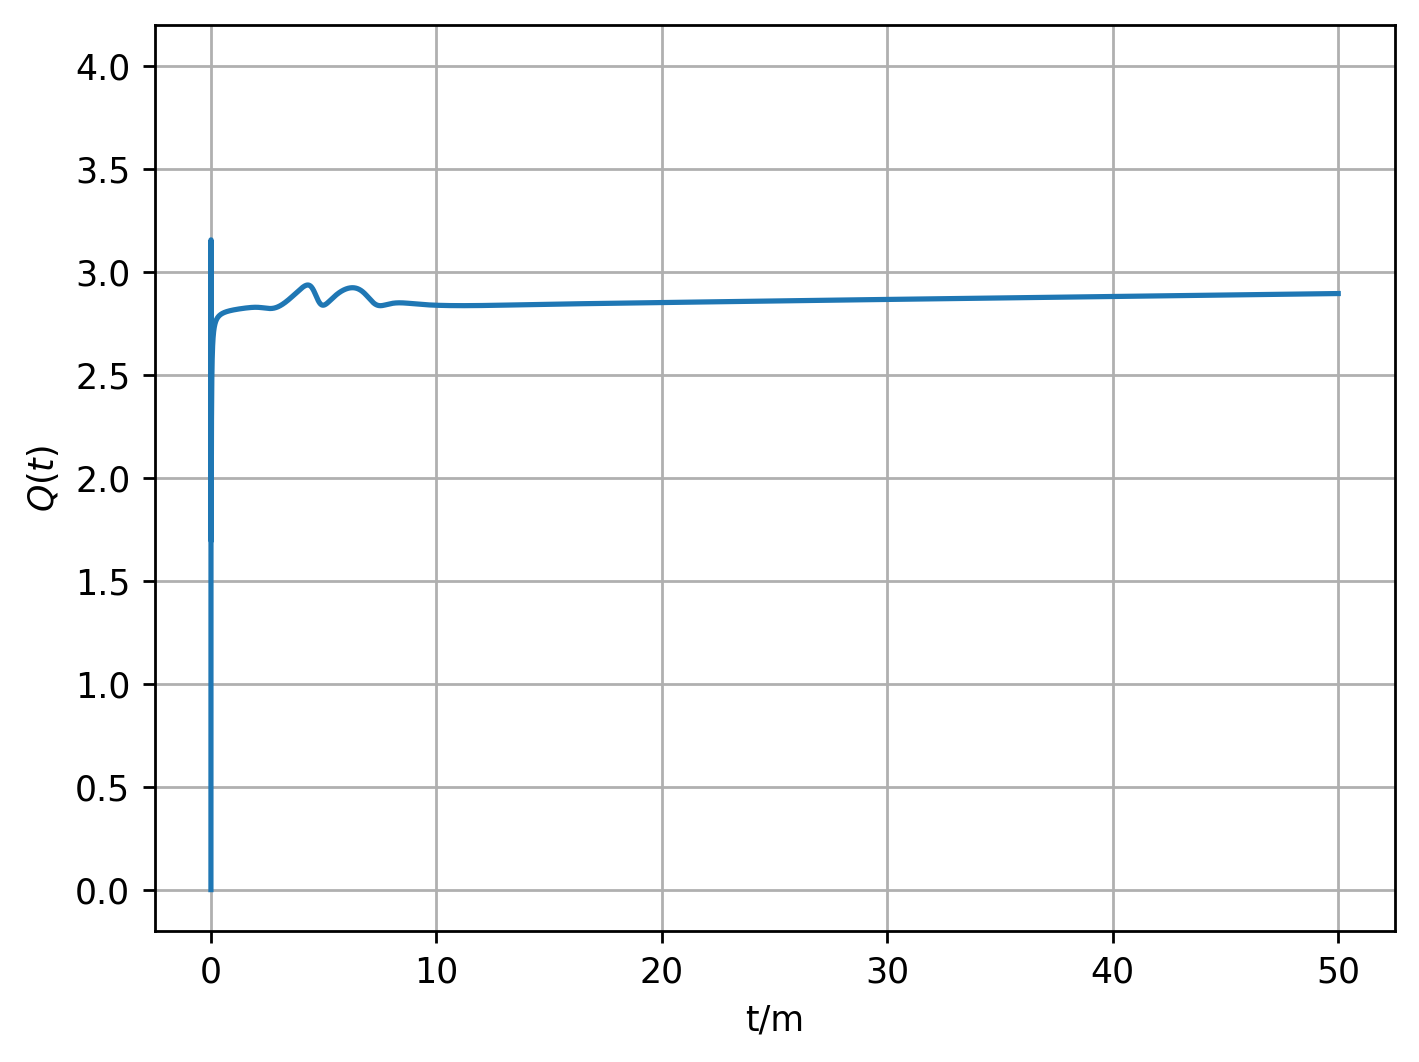

In [11]:
plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.plot(t_con, con)
plt.ylim(-0.2, 4.2)
plt.grid(True)

plt.xlabel('t/m')
plt.ylabel('$Q(t)$')

#plt.savefig('figures/conv_cmc.jpg')
plt.show()

# Analysing CMC Data

In [110]:
phi, t, r = imp(2, 'phi_cmc')

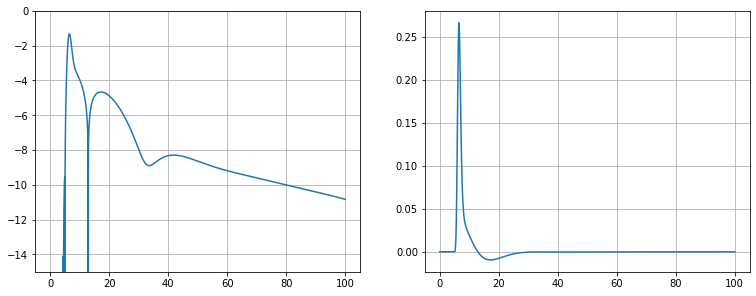

l = 0
lower limit: 13
upper limit: 40


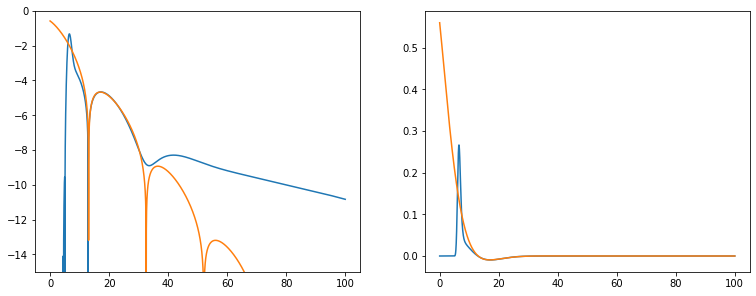

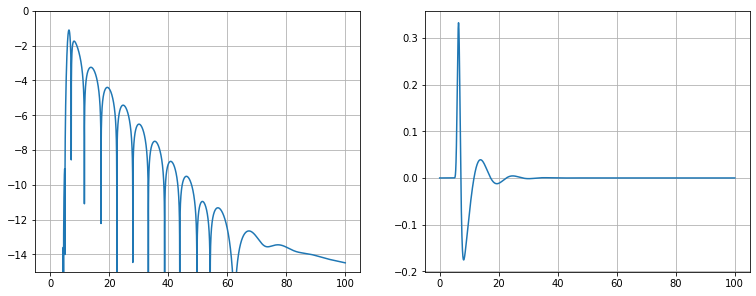

l = 1
lower limit: 20
upper limit: 35


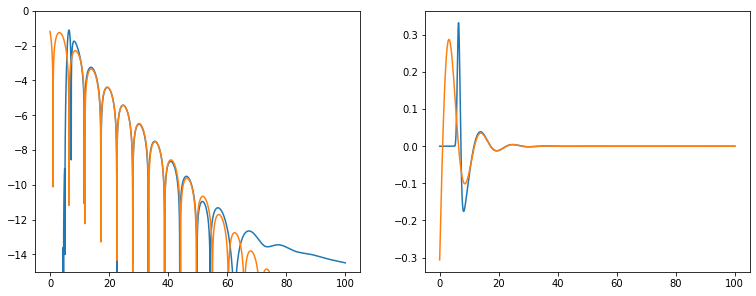

 0: 0.1609 - 0.2183 i
 1: 0.5818 - 0.1937 i


array([[0.16091078, 0.21830893],
       [0.58177655, 0.19371857]])

In [115]:
analyze(phi, t, r, 0.5)

In [ ]:
ar = np.array([[0.16988808, 0.25297392],
       [0.58184271, 0.19363056],
       [0.96735248, 0.19431127],
       [1.35070547, 0.19373201],
       [1.73483633, 0.19343977],
       [2.11923754, 0.19323309],
       [2.50378932, 0.19306627],
       [2.8884373 , 0.19291792],
       [3.27315084, 0.19277746],
       [3.65791043, 0.19264195]])

In [ ]:
print(ar.round(6))

# analysing first qnm

In [106]:
phi, t, r = imp(10, 'phi_fir')

In [ ]:
def analyze(phi, t, r, rfix):
    # some params
    l_max = phi[0,0,:].size
    omega = np.empty((l_max,2))
    dt = t[1] - t[0]
    dr = r[1] - r[0]
    r_fix = int(rfix/dr)
    
    # looping over all l's
    for l in range(l_max):
        plt.figure(figsize=(12.8, 4.8))
        plt.subplot(121)
        plt.plot(t, np.log(np.abs(phi[:,r_fix,l])))
        plt.grid(True)
        plt.ylim(-15,0)
        
        plt.subplot(122)
        plt.plot(t, phi[:,r_fix,l])
        plt.grid(True)
        plt.show()
        print('l = {}'.format(l))
        t_min = float(input("lower limit: "))
        t_max = float(input("upper limit: "))
        
        phi_a = phi[int(t_min/dt):int(t_max/dt),r_fix,l]
        t_a = t[int(t_min/dt):int(t_max/dt)]
        bounds = (np.array([0.001,0.01,0.000001,0]),np.array([l_max,0.5,1000,200]))
        #guess = np.array([l/2,0.2,30,np.pi*1.3])
        #P,Mp = opt.curve_fit(QNM, lt, lphi, p0=guess, method='trf', bounds=bounds)
        P, Mp = opt.curve_fit(QNM, t_a, phi_a, method='trf', bounds=bounds)
        omega[l,:] = P[0:2]
        
        fit = QNM(t, *P)
        
        plt.figure(figsize=(12.8, 4.8))
        plt.subplot(121)
        plt.plot(t, np.log(np.abs(phi[:,r_fix,l])))
        plt.plot(t, np.log(np.abs(fit)))
        plt.ylim(-15,0)
        
        plt.subplot(122)
        plt.plot(t, phi[:,r_fix,l])
        plt.plot(t, fit)
        plt.show()
    
    for l in range(l_max):
        print('{:2d}: {:1.4f} - {:1.4f} i'.format(l, omega[l,0], omega[l,1]))

    return omega

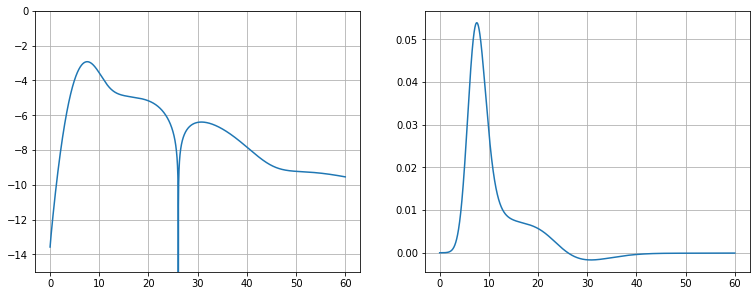

l = 0
lower limit: 27
upper limit: 35


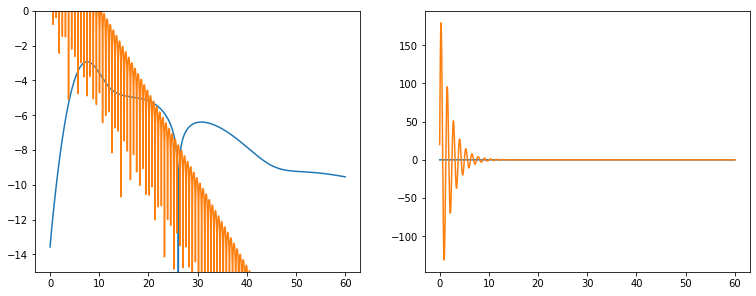

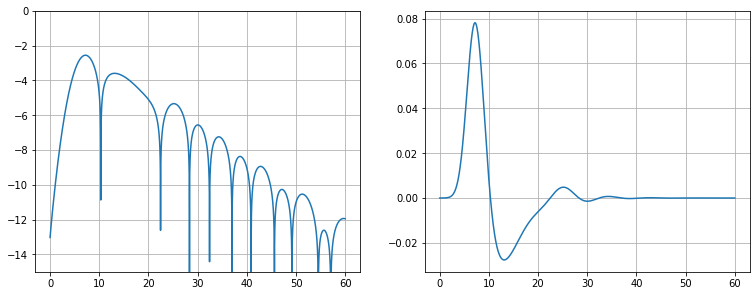

l = 1
lower limit: 30
upper limit: 50


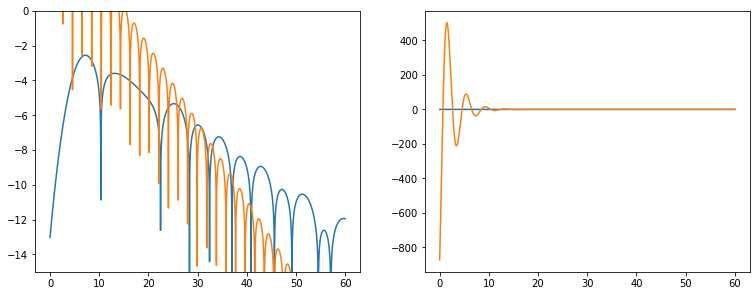

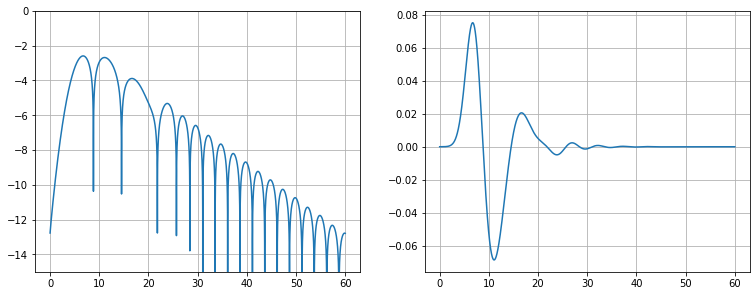

l = 2
lower limit: 30
upper limit: 50


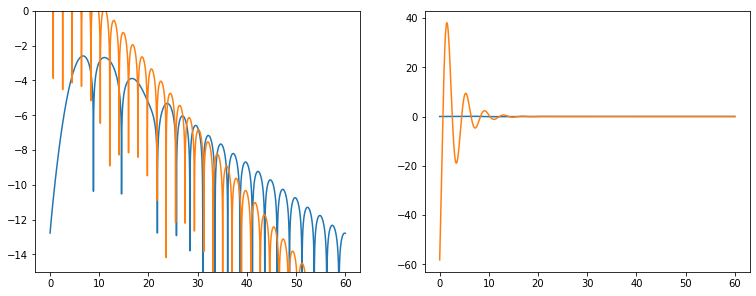

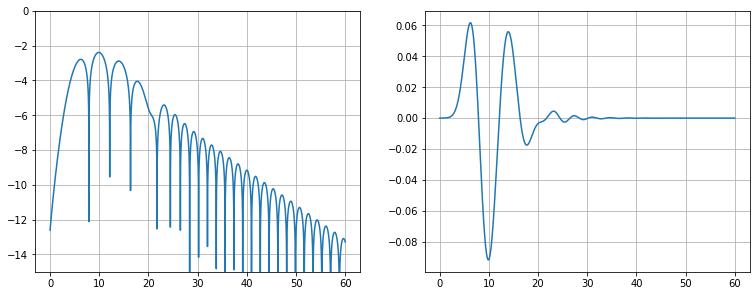

l = 3
lower limit: 30
upper limit: 50


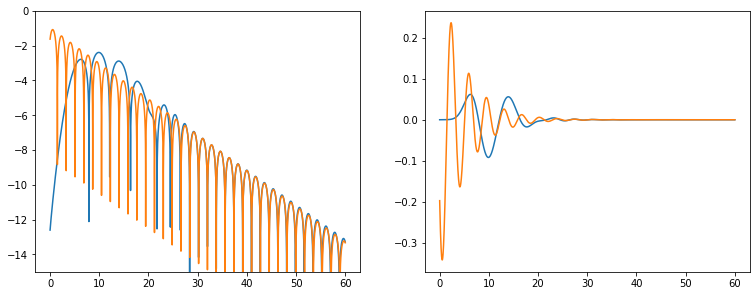

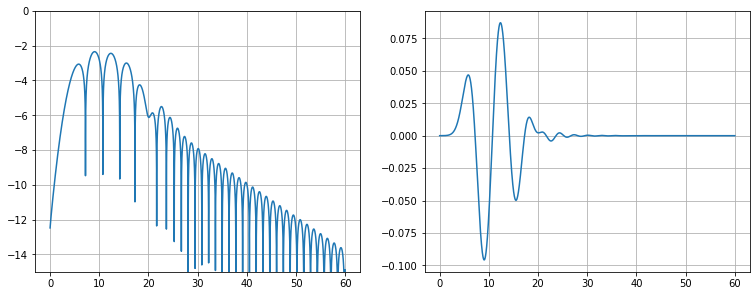

l = 4
lower limit: 35
upper limit: 50


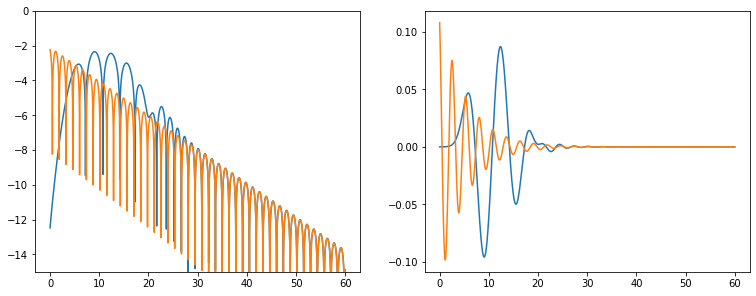

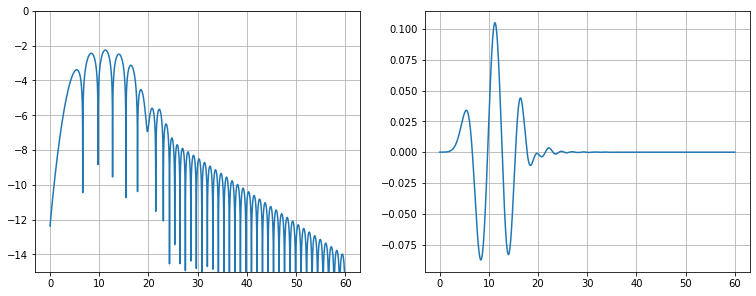

l = 5
lower limit: 30
upper limit: 50


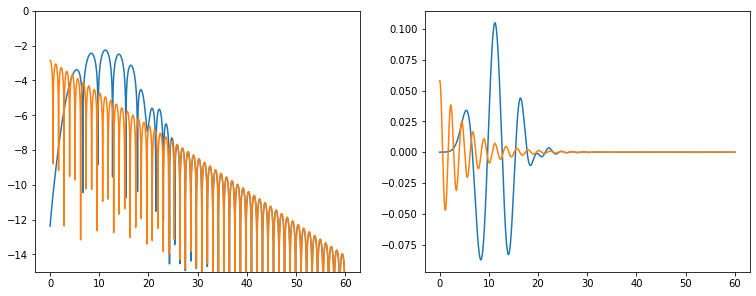

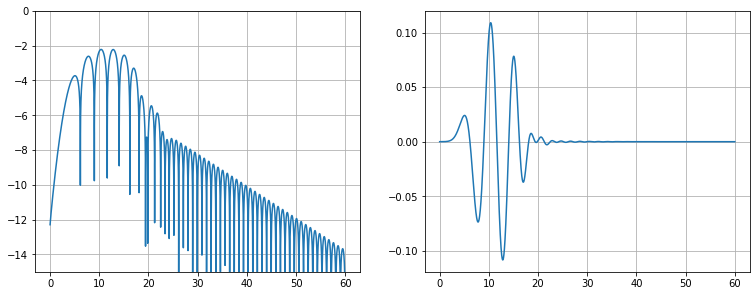

l = 6
lower limit: 30
upper limit: 50


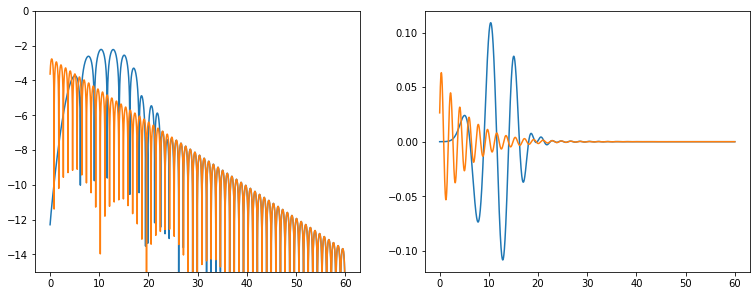

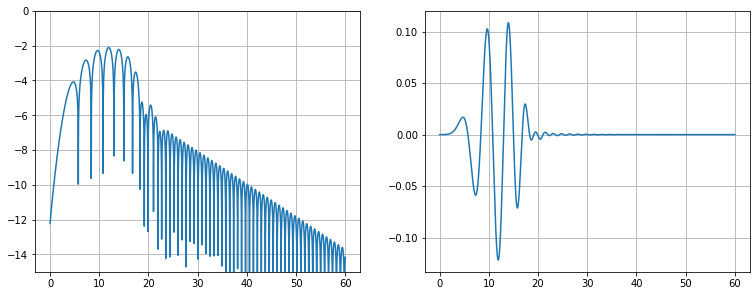

l = 7
lower limit: 30
upper limit: 55


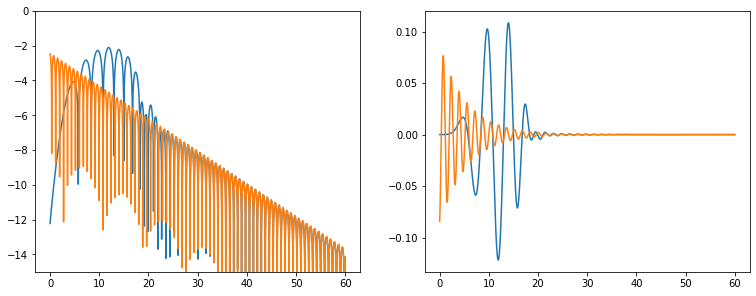

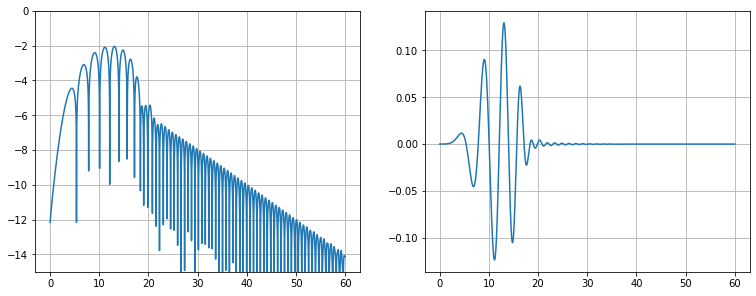

l = 8
lower limit: 30
upper limit: 55


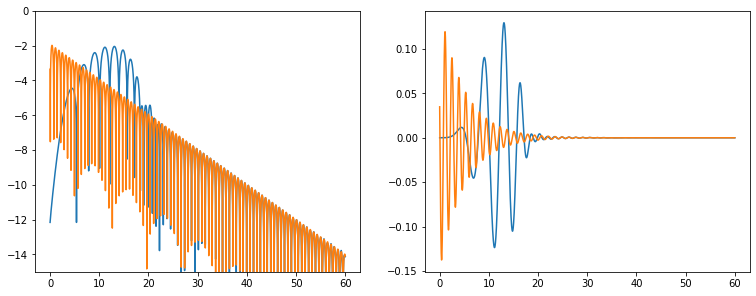

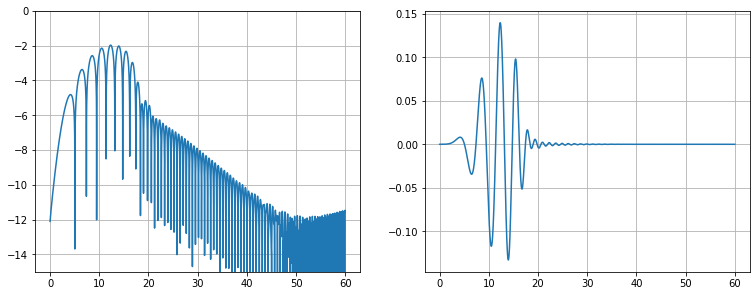

l = 9
lower limit: 30
upper limit: 40


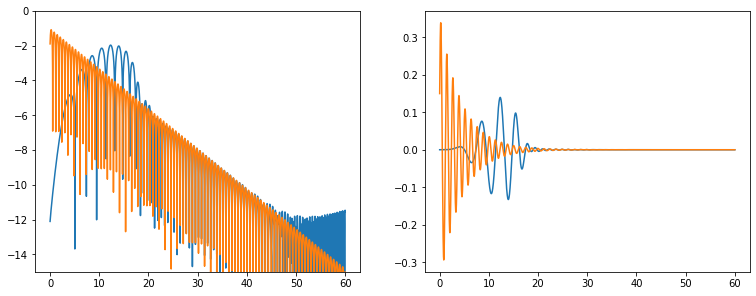

 0: 4.9946 - 0.5000 i
 1: 1.6111 - 0.4437 i
 2: 1.6422 - 0.3650 i
 3: 1.7508 - 0.2052 i
 4: 2.2749 - 0.1949 i
 5: 2.8043 - 0.1872 i
 6: 3.3454 - 0.1843 i
 7: 3.9070 - 0.1876 i
 8: 4.4877 - 0.2017 i
 9: 5.0881 - 0.2299 i


array([[4.99455684, 0.5       ],
       [1.61111983, 0.44373358],
       [1.64224063, 0.36495142],
       [1.75079658, 0.2051537 ],
       [2.27492935, 0.19492927],
       [2.80427901, 0.18723748],
       [3.34535692, 0.18431268],
       [3.90697429, 0.18757907],
       [4.48772456, 0.2016672 ],
       [5.08811488, 0.22994991]])

In [90]:
analyze(phi, t, r, 10)

In [ ]:
ar = np.array([[0.32912843, 0.48610358],
       [0.7408663 , 0.20576443],
       [1.2526045 , 0.20261282],
       [1.77231232, 0.19852047],
       [2.30632878, 0.19626898],
       [2.85943924, 0.20088978],
       [3.43420416, 0.21741452],
       [4.03397446, 0.24883738],
       [4.65726711, 0.30108998],
       [5.31205583, 0.35806052]])

In [ ]:
ar = np.array([[0.33039884, 0.48335647],
       [0.74006244, 0.20624979],
       [1.24793124, 0.20381534],
       [1.75820847, 0.1996762 ],
       [2.27526353, 0.19389688],
       [2.80366567, 0.188109  ],
       [3.34738551, 0.18484306],
       [3.90883674, 0.18837681],
       [4.48948685, 0.202723  ],
       [5.09314682, 0.22997293]])

In [ ]:
print(ar.round(6))

In [8]:
con = np.load('phi_fir/conv.npy')
t_con = np.load('phi_fir/t_conv.npy')

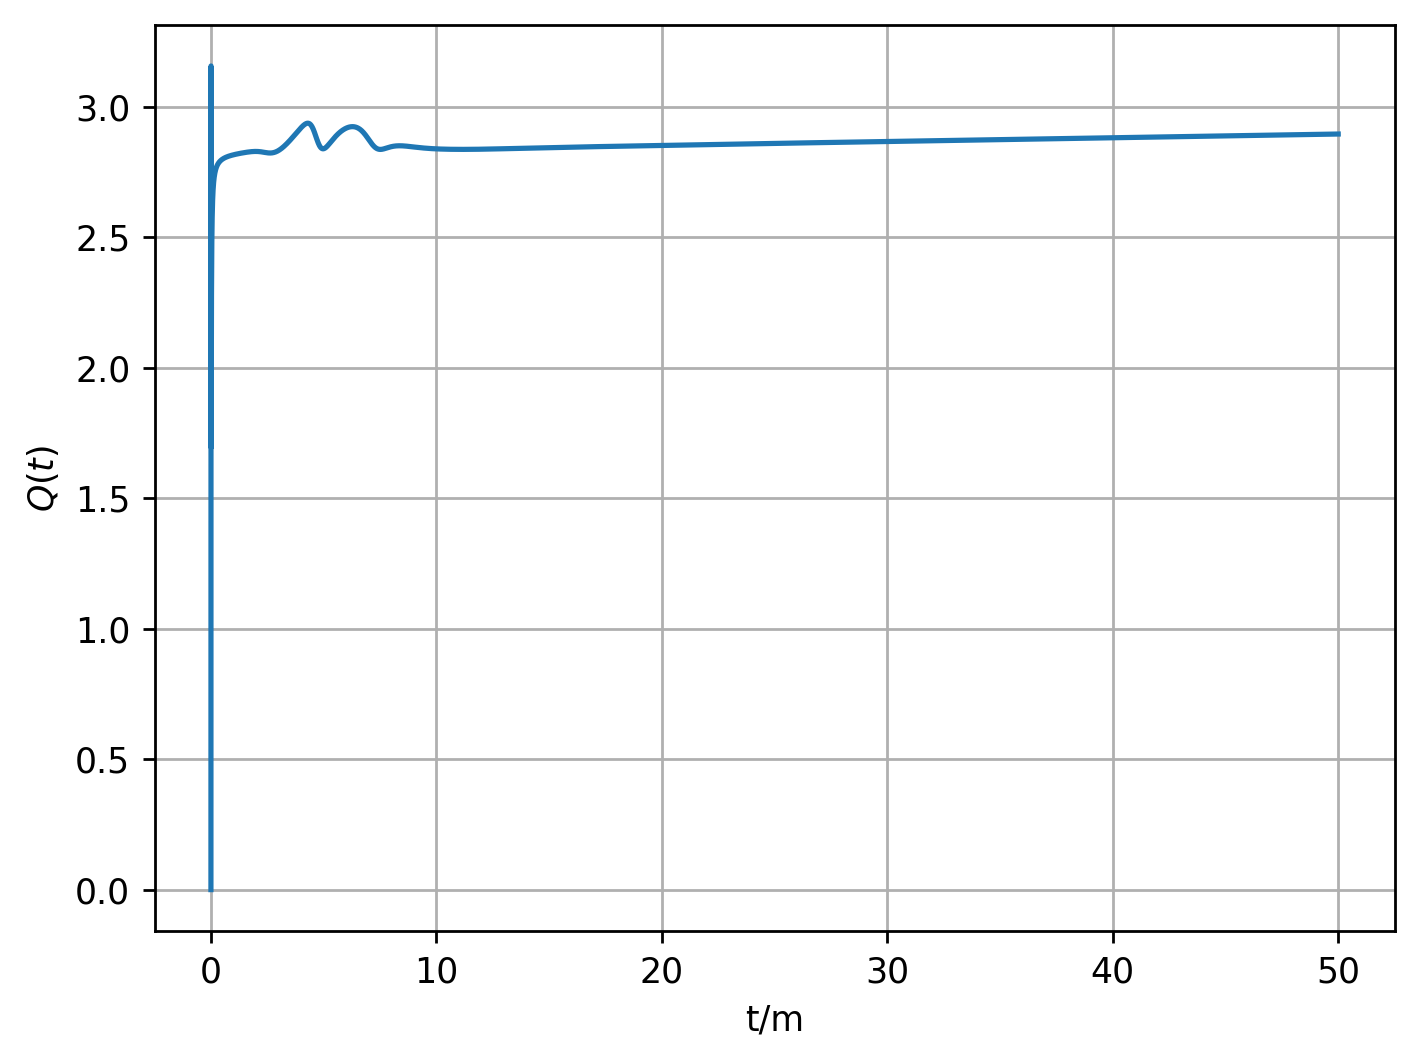

In [10]:
plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.plot(t_con, con)
plt.grid(True)

plt.xlabel('t/m')
plt.ylabel('$Q(t)$')

plt.savefig('figures/conv_first.jpg')
plt.show()

# Creating Plots

In [2]:
# time evolution
# loading cmc data:
phi, t, r = imp(10, 'phi_cmc')

(100000, 250, 10)


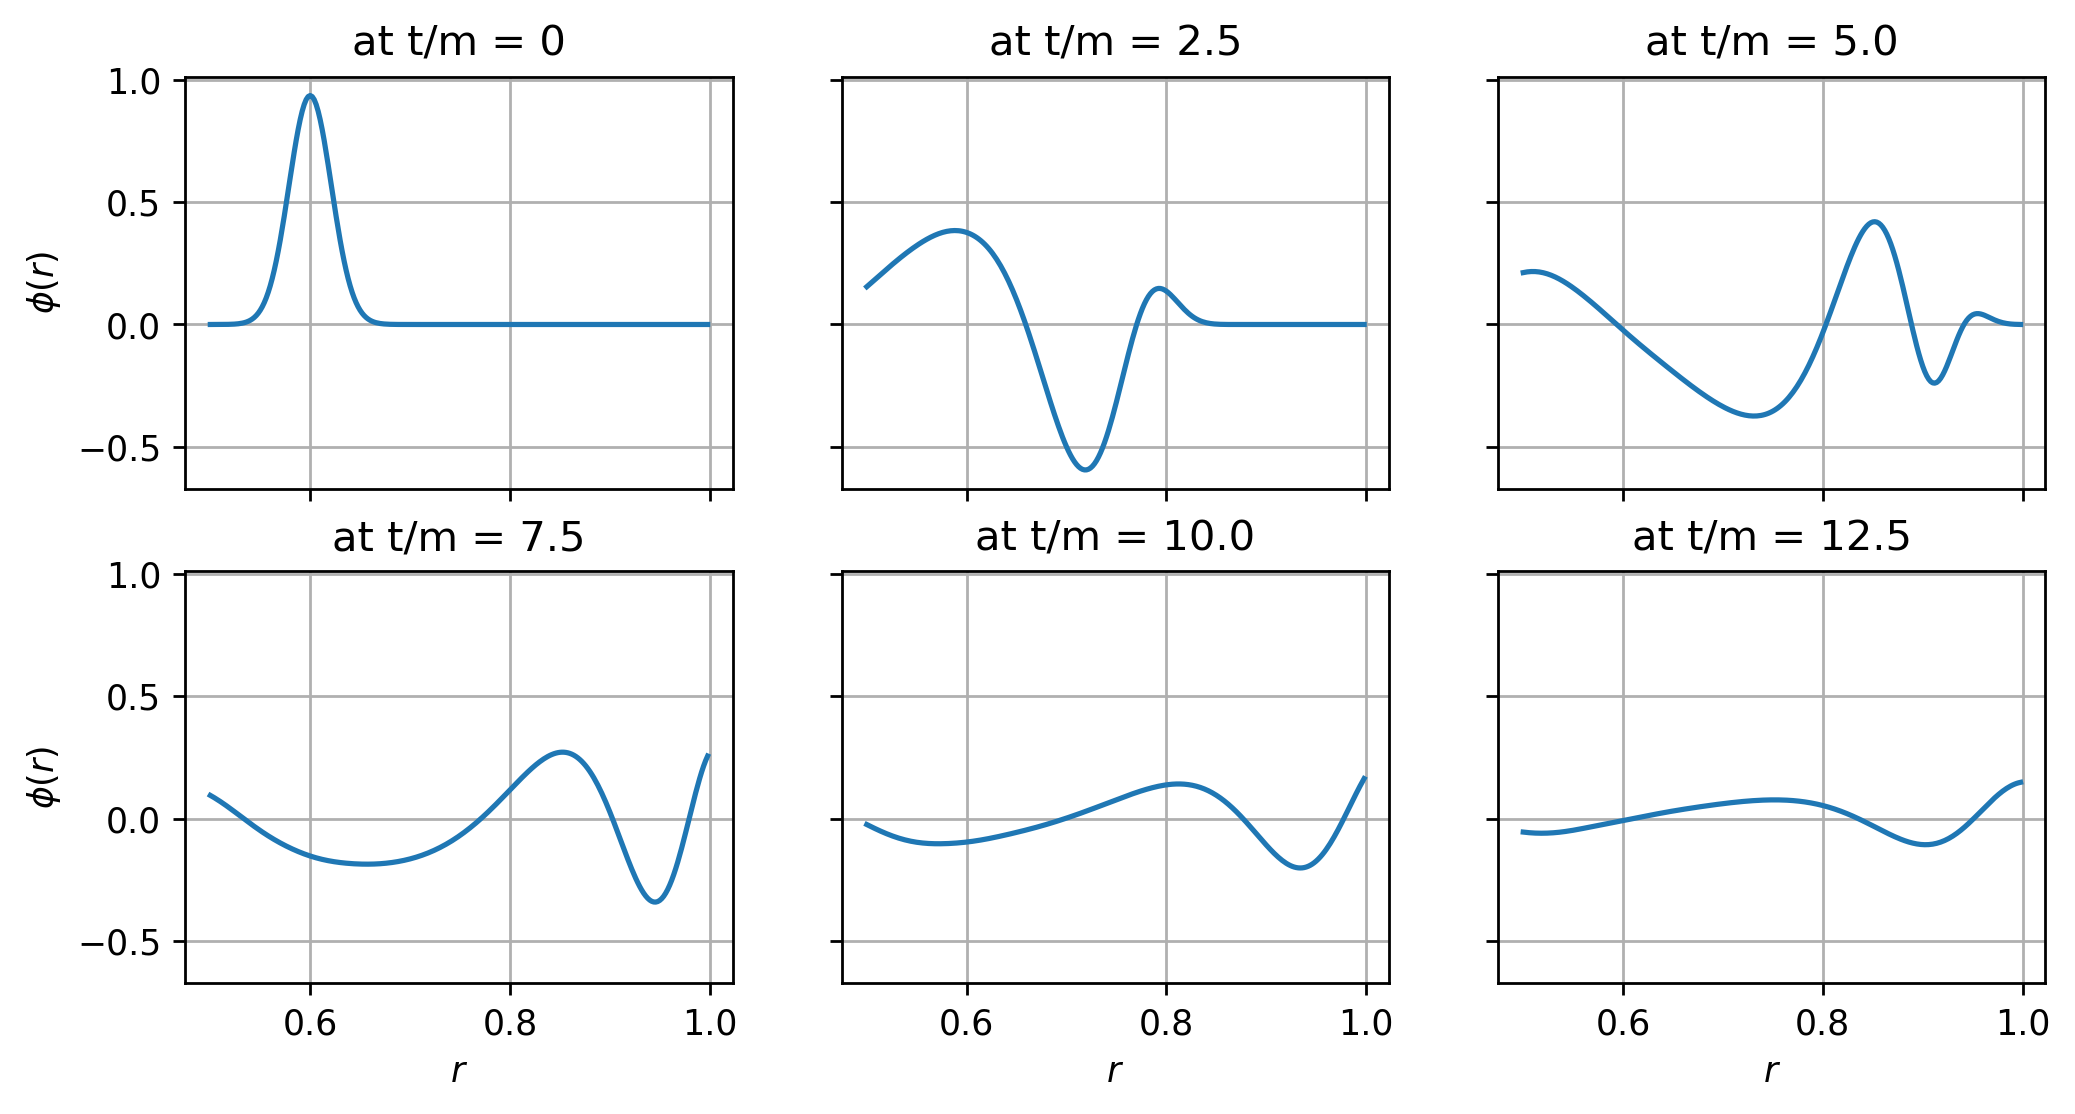

In [23]:
print(phi.shape)

phip = phi[:,:,5]

plt.figure(figsize=(3/2*6.4, 4.8), dpi=250)

ax1 = plt.subplot(231)
plt.plot(r, phip[0*phi.shape[0],:])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('$\phi(r)$')
plt.title('at t/m = 0')
plt.grid(True)

ax2 = plt.subplot(232, sharey=ax1)
plt.plot(r, phip[int(0.025*phi.shape[0]),:])
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.title('at t/m = {}'.format(t[int(0.025*phi.shape[0])]))
plt.grid(True)

ax3 = plt.subplot(233, sharey=ax1)
plt.plot(r, phip[int(0.05*phi.shape[0]),:])
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.title('at t/m = {}'.format(t[int(0.05*phi.shape[0])]))
plt.grid(True)

ax4 = plt.subplot(234, sharey=ax1)
plt.plot(r, phip[int(0.075*phi.shape[0]),:])
plt.ylabel('$\phi(r)$')
plt.xlabel('$r$')
plt.title('at t/m = {}'.format(t[int(0.075*phi.shape[0])]))
plt.grid(True)

ax5 = plt.subplot(235, sharey=ax1)
plt.plot(r, phip[int(0.1*phi.shape[0]),:])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.xlabel('$r$')
plt.title('at t/m = {}'.format(t[int(0.1*phi.shape[0])]))
plt.grid(True)

ax6 = plt.subplot(236, sharey=ax1)
plt.plot(r, phip[int(0.125*phi.shape[0]),:])
plt.setp(ax6.get_yticklabels(), visible=False)
plt.title('at t/m = {}'.format(t[int(0.125*phi.shape[0])]))
plt.xlabel('$r$')
plt.grid(True)

plt.savefig('figures/QNM_evol_cmc.jpg')
plt.show()

(100000, 250, 10)


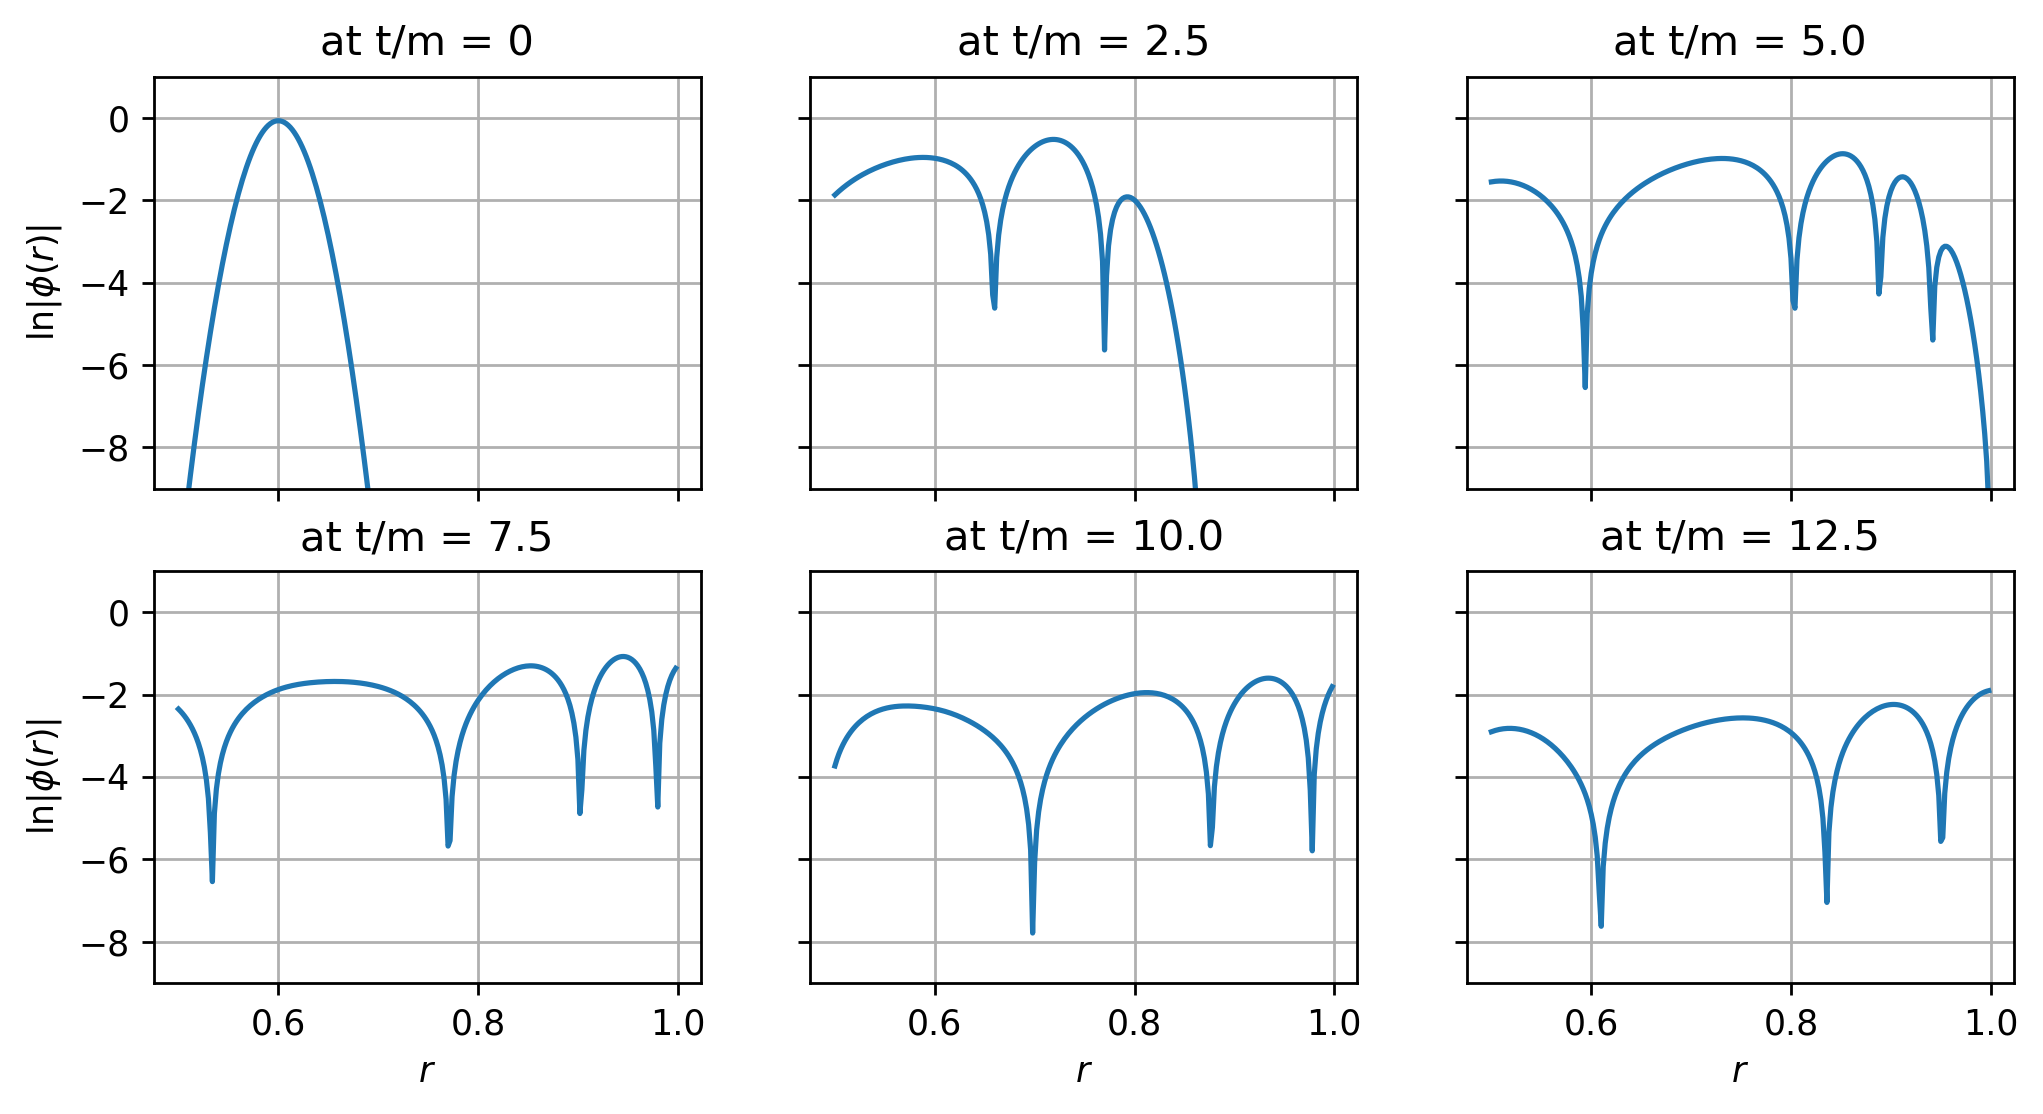

In [27]:
print(phi.shape)

phip = np.log(np.abs(phi[:,:,5]),)

plt.figure(figsize=(3/2*6.4, 4.8), dpi=250)

ax1 = plt.subplot(231)
plt.ylim(-9,1)
plt.plot(r, phip[0*phi.shape[0],:])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.ylabel('$\ln|\phi(r)|$')
plt.title('at t/m = 0')
plt.grid(True)

ax2 = plt.subplot(232, sharey=ax1)
plt.plot(r, phip[int(0.025*phi.shape[0]),:])
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.title('at t/m = {}'.format(t[int(0.025*phi.shape[0])]))
plt.grid(True)

ax3 = plt.subplot(233, sharey=ax1)
plt.plot(r, phip[int(0.05*phi.shape[0]),:])
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.title('at t/m = {}'.format(t[int(0.05*phi.shape[0])]))
plt.grid(True)

ax4 = plt.subplot(234, sharey=ax1)
plt.plot(r, phip[int(0.075*phi.shape[0]),:])
plt.ylabel('$\ln|\phi(r)|$')
plt.xlabel('$r$')
plt.title('at t/m = {}'.format(t[int(0.075*phi.shape[0])]))
plt.grid(True)

ax5 = plt.subplot(235, sharey=ax1)
plt.plot(r, phip[int(0.1*phi.shape[0]),:])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.xlabel('$r$')
plt.title('at t/m = {}'.format(t[int(0.1*phi.shape[0])]))
plt.grid(True)

ax6 = plt.subplot(236, sharey=ax1)
plt.plot(r, phip[int(0.125*phi.shape[0]),:])
plt.setp(ax6.get_yticklabels(), visible=False)
plt.title('at t/m = {}'.format(t[int(0.125*phi.shape[0])]))
plt.xlabel('$r$')
plt.grid(True)

plt.savefig('figures/QNM_evol_cmc_log.jpg')
plt.show()

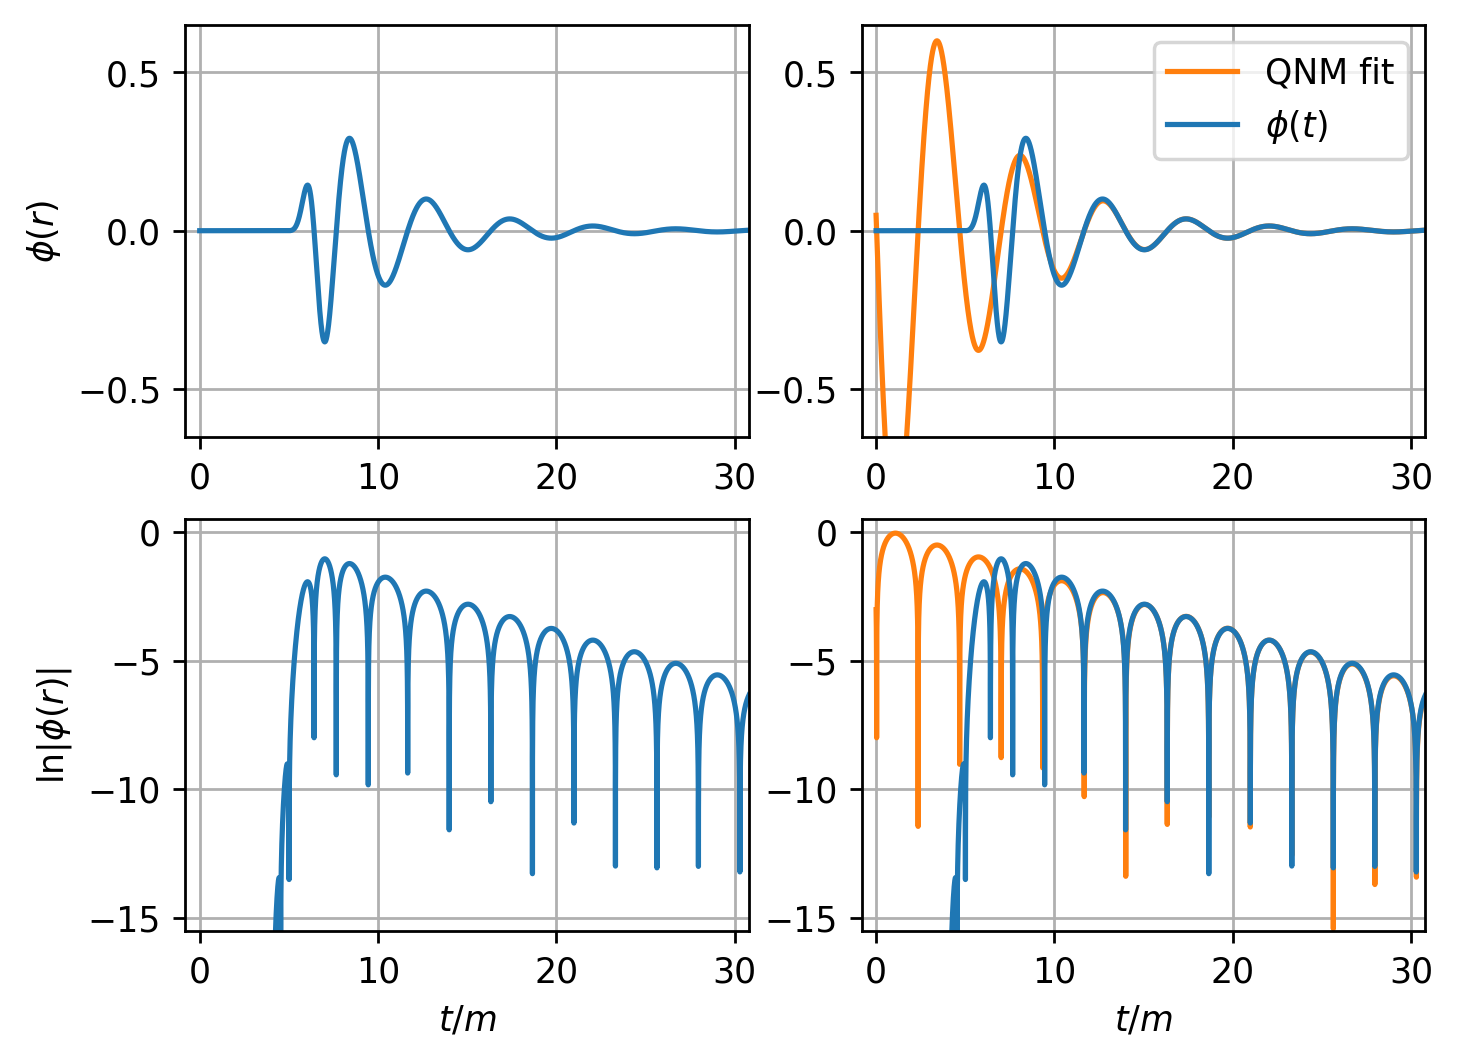

In [39]:
phip = phi[:,249,3]

plt.figure(figsize=(6.4, 4.8), dpi=250)

ax = plt.subplot(221)
plt.plot(t, phip)
plt.ylim(-0.65, 0.65)
plt.xlim(-0.8, 30.8)
plt.ylabel('$\phi(r)$')
plt.grid(True)

dt = t[1] - t[0]
phi_a = phip[int(15/dt):int(60/dt)]
t_a = t[int(15/dt):int(60/dt)]
bounds = (np.array([0.001,0.01,0.000001,0]),np.array([5,0.5,1000,200]))
P, Mp = opt.curve_fit(QNM, t_a, phi_a, method='trf', bounds=bounds)
#omega[l,:] = P[0:2]
        
fit = QNM(t, *P)

plt.subplot(222, sharey=ax, sharex=ax)
plt.plot(t, fit, color='tab:orange', label='QNM fit')
plt.plot(t, phip, label='$\phi(t)$')
plt.legend()
plt.grid(True)

ax2 = plt.subplot(223, sharex=ax)
plt.plot(t, np.log(np.abs(phip)))
plt.ylim(-15.5, 0.5)
plt.ylabel('$\ln|\phi(r)|$')
plt.xlabel('$t/m$')
plt.grid(True)

plt.subplot(224, sharex=ax, sharey=ax2)
plt.plot(t, np.log(np.abs(fit)), color='tab:orange')
plt.plot(t, np.log(np.abs(phip)))
plt.xlabel('$t/m$')
plt.grid(True)

plt.savefig('figures/QNM_fit.jpg')
plt.show()

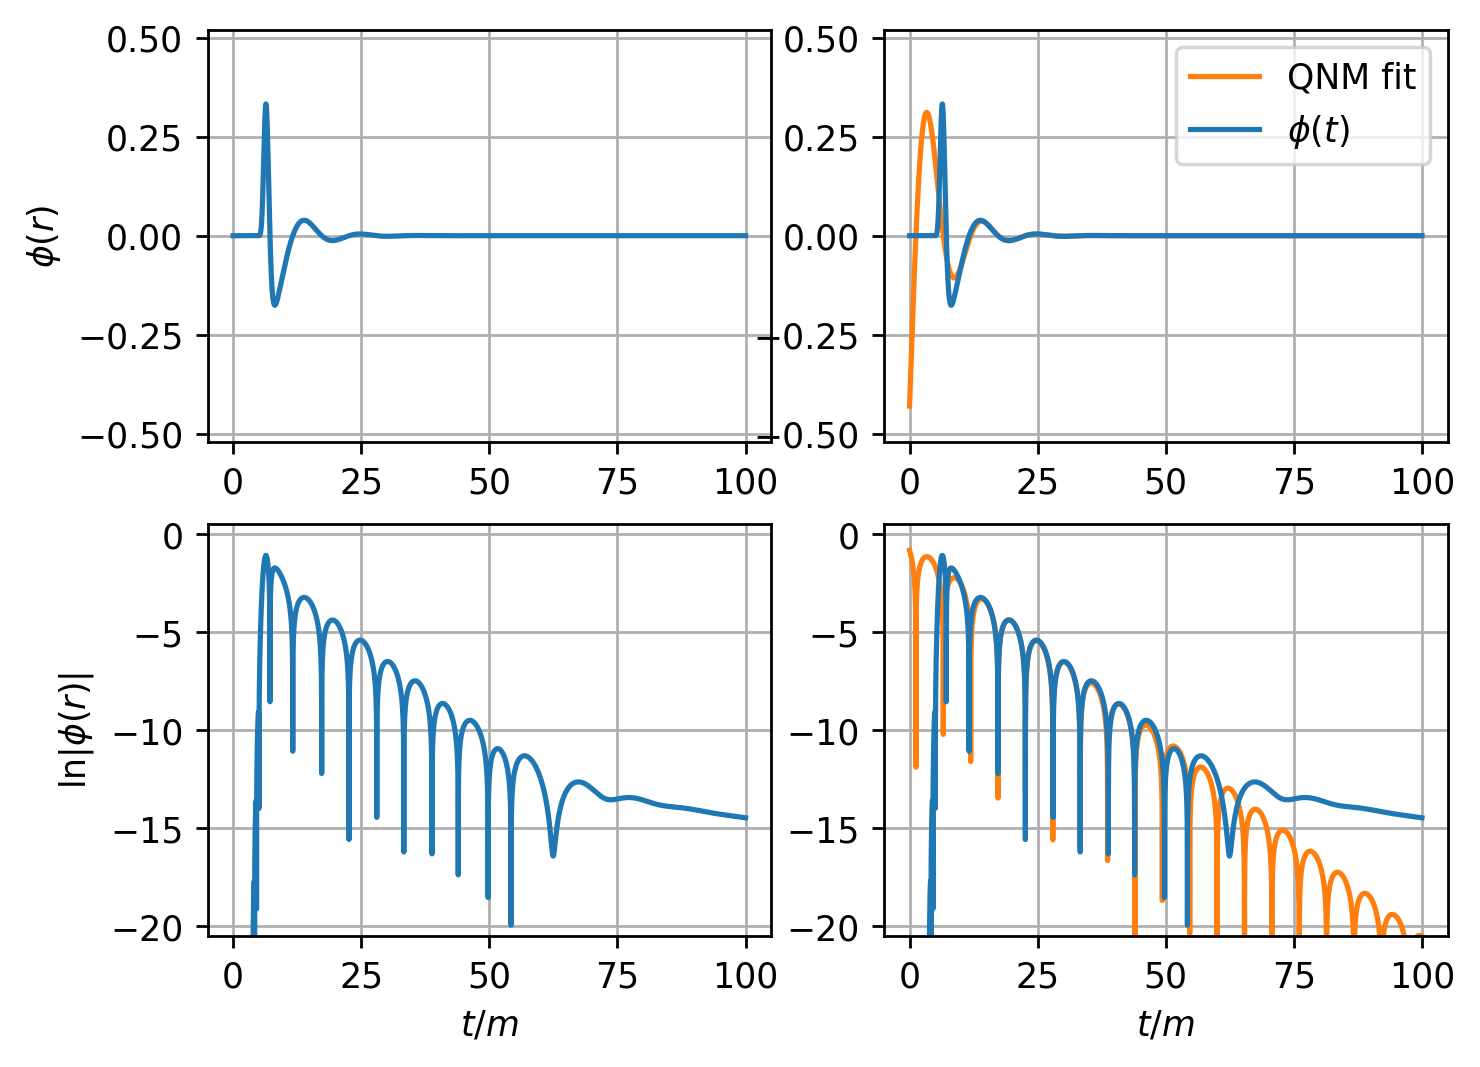

In [38]:
phip = phi[:,249,1]

plt.figure(figsize=(6.4, 4.8), dpi=250)

ax = plt.subplot(221)
plt.plot(t, phip)
plt.ylim(-0.52, 0.52)
plt.ylabel('$\phi(r)$')
#plt.xlim(0,40)
plt.grid(True)

dt = t[1] - t[0]
phi_a = phip[int(15/dt):int(40/dt)]
t_a = t[int(15/dt):int(40/dt)]
bounds = (np.array([0.001,0.01,0.000001,0]),np.array([5,0.5,1000,200]))
P, Mp = opt.curve_fit(QNM, t_a, phi_a, method='trf', bounds=bounds)
#omega[l,:] = P[0:2]
        
fit = QNM(t, *P)

plt.subplot(222, sharey=ax, sharex=ax)
plt.plot(t, fit, color='tab:orange', label='QNM fit')
plt.plot(t, phip, label='$\phi(t)$')
plt.legend()
plt.grid(True)

ax2 = plt.subplot(223, sharex=ax)
plt.plot(t, np.log(np.abs(phip)))
plt.ylim(-20.5, 0.5)
plt.ylabel('$\ln|\phi(r)|$')
plt.xlabel('$t/m$')
plt.grid(True)

plt.subplot(224, sharex=ax, sharey=ax2)
plt.plot(t, np.log(np.abs(fit)), color='tab:orange')
plt.plot(t, np.log(np.abs(phip)))
plt.xlabel('$t/m$')
plt.grid(True)

plt.savefig('figures/QNM.jpg')
plt.show()

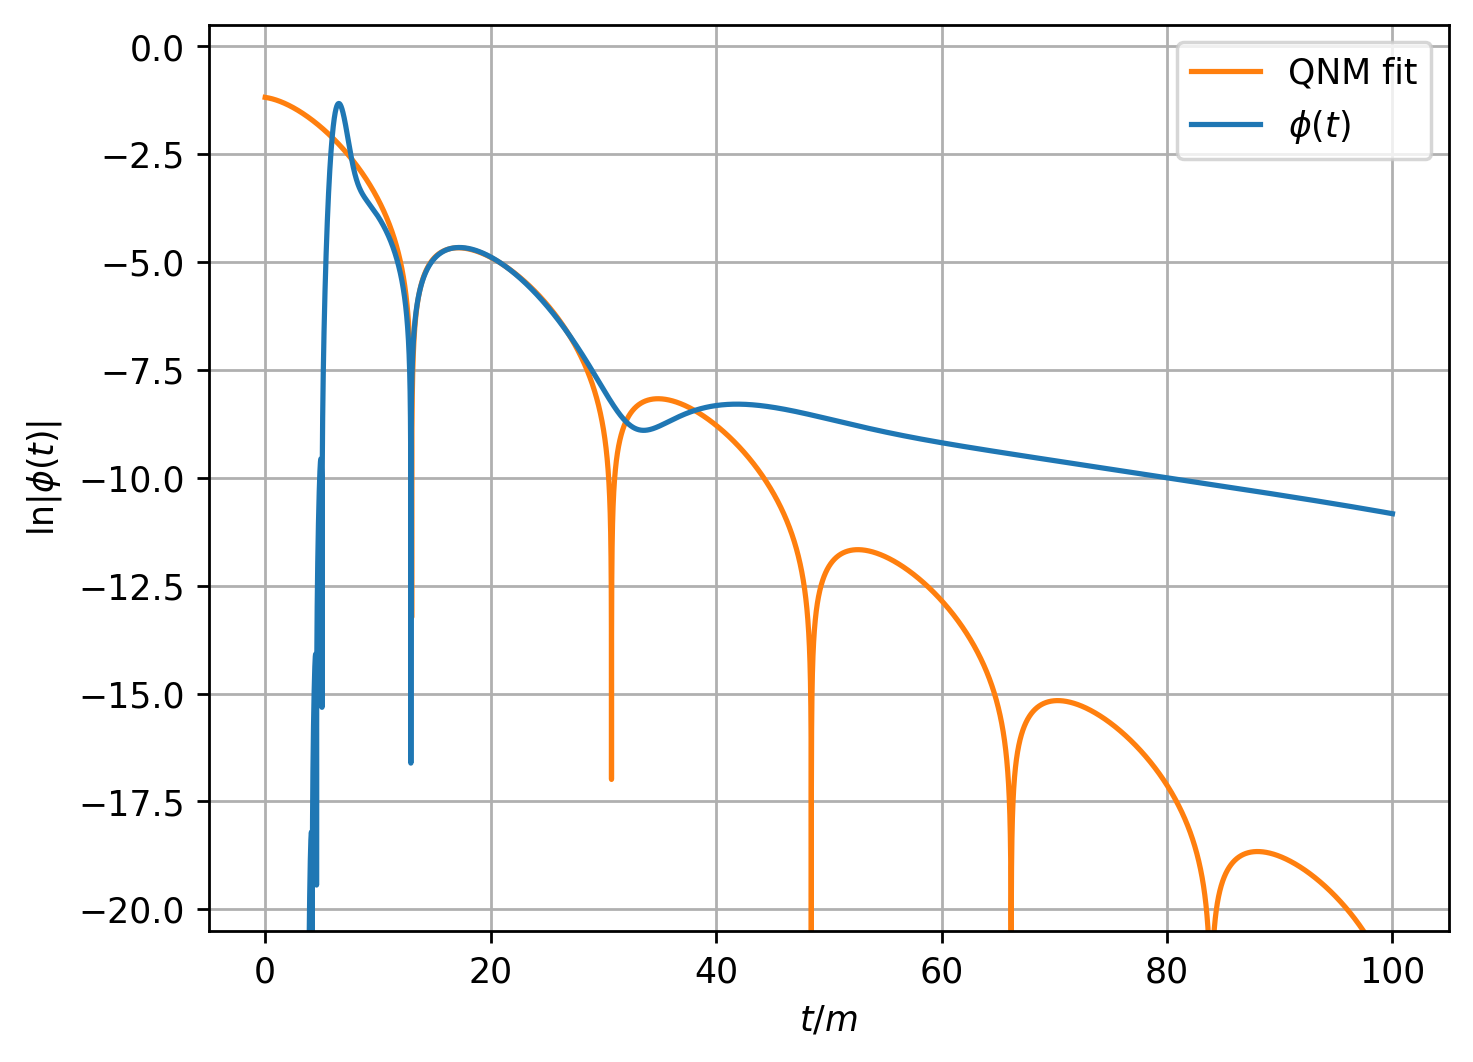

In [3]:
phip = phi[:,249,0]

plt.figure(figsize=(6.4, 4.8), dpi=250)


dt = t[1] - t[0]
phi_a = phip[int(13/dt):int(30/dt)]
t_a = t[int(13/dt):int(30/dt)]
bounds = (np.array([0.001,0.01,0.000001,0]),np.array([5,0.5,1000,200]))
P, Mp = opt.curve_fit(QNM, t_a, phi_a, method='trf', bounds=bounds)
#omega[l,:] = P[0:2]
        
fit = QNM(t, *P)

plt.plot(t, np.log(np.abs(fit)), color='tab:orange', label='QNM fit', linestyle='-')
plt.plot(t, np.log(np.abs(phip)), label='$\phi(t)$')
plt.ylim(-20.5, 0.5)
plt.ylabel('$\ln|\phi(t)|$')
plt.xlabel('$t/m$')
plt.legend()
plt.grid(True)

plt.savefig('figures/fit_0.jpg')
plt.show()

# Plotting naive data:

In [40]:
# loading first approach data
phi, t, r = imp(10, 'phi_fir')

(21334, 1587, 10)


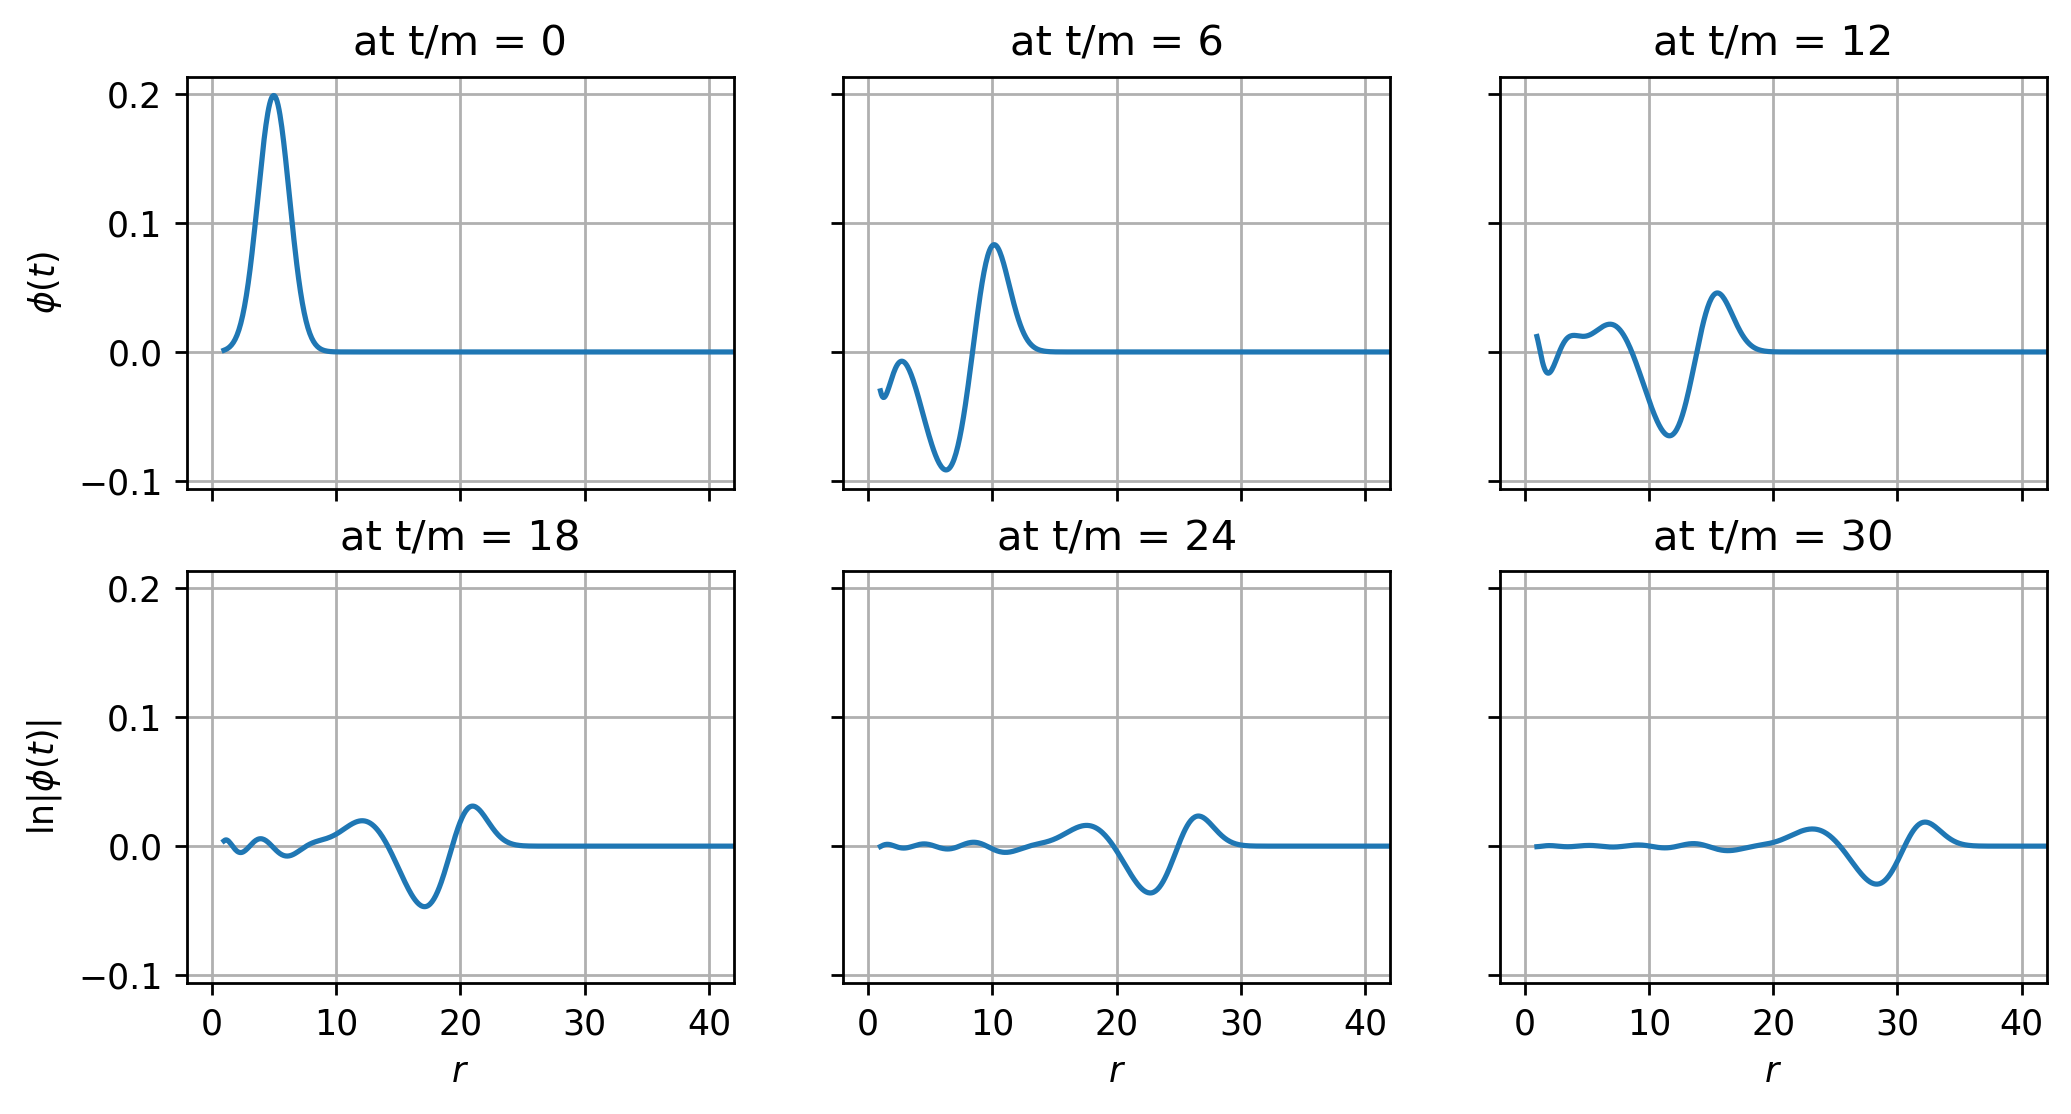

In [44]:
print(phi.shape)

phip = phi[:,:,2]

plt.figure(figsize=(3/2*6.4, 4.8), dpi=250)

ax1 = plt.subplot(231)
plt.plot(r, phip[0*phi.shape[0],:])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title('at t/m = 0')
plt.ylabel('$\phi(t)$')
plt.xlim(-2, 42)
plt.grid(True)

ax2 = plt.subplot(232, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.1*phi.shape[0]),:])
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.1*phi.shape[0])]))
plt.grid(True)

ax3 = plt.subplot(233, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.2*phi.shape[0]),:])
plt.setp(ax3.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.2*phi.shape[0])]))
plt.grid(True)

ax4 = plt.subplot(234, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.3*phi.shape[0]),:])
plt.title('at t/m = {:.0f}'.format(t[int(0.3*phi.shape[0])]))
plt.ylabel('$\ln|\phi(t)|$')
plt.xlabel('$r$')
plt.grid(True)

ax5 = plt.subplot(235, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.4*phi.shape[0]),:])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.4*phi.shape[0])]))
plt.xlabel('$r$')
plt.grid(True)

ax6 = plt.subplot(236, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.5*phi.shape[0]),:])
plt.setp(ax6.get_yticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.5*phi.shape[0])]))
plt.xlabel('$r$')
plt.grid(True)

plt.savefig('figures/QNM_evol_fir.jpg')
plt.show()

(21334, 1587, 10)


/home/lw/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


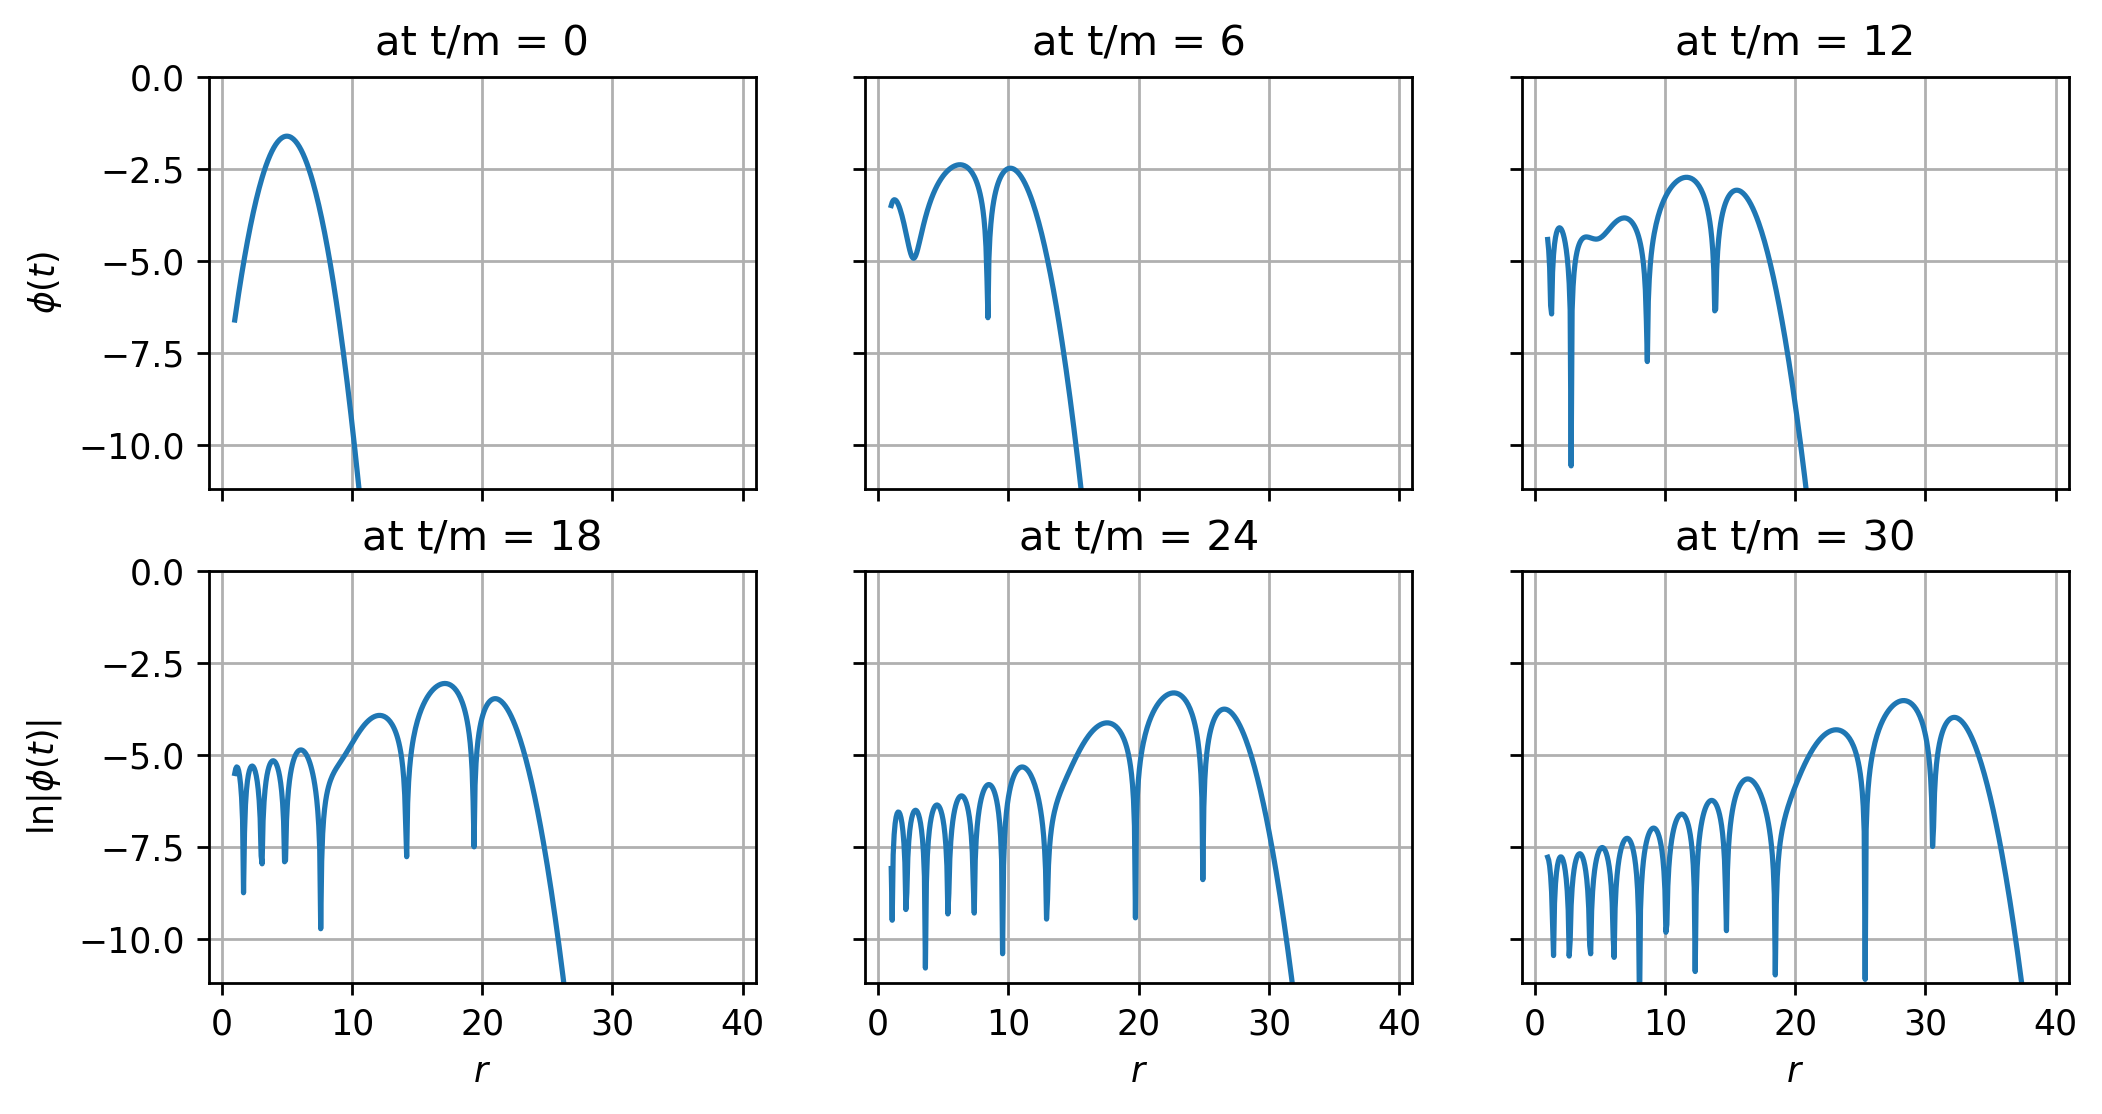

In [46]:
print(phi.shape)

phip = np.log(np.abs(phi[:,:,2]))

plt.figure(figsize=(3/2*6.4, 4.8), dpi=250)

ax1 = plt.subplot(231)
plt.plot(r, phip[0*phi.shape[0],:])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.title('at t/m = 0')
plt.ylabel('$\phi(t)$')
plt.xlim(-1, 41)
plt.ylim(-11.2, 0)
plt.grid(True)

ax2 = plt.subplot(232, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.1*phi.shape[0]),:])
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.1*phi.shape[0])]))
plt.grid(True)

ax3 = plt.subplot(233, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.2*phi.shape[0]),:])
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.2*phi.shape[0])]))
plt.grid(True)

ax4 = plt.subplot(234, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.3*phi.shape[0]),:])
plt.title('at t/m = {:.0f}'.format(t[int(0.3*phi.shape[0])]))
plt.ylabel('$\ln|\phi(t)|$')
plt.xlabel('$r$')
plt.grid(True)

ax5 = plt.subplot(235, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.4*phi.shape[0]),:])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.4*phi.shape[0])]))
plt.xlabel('$r$')
plt.grid(True)

ax6 = plt.subplot(236, sharey=ax1, sharex=ax1)
plt.plot(r, phip[int(0.5*phi.shape[0]),:])
plt.setp(ax6.get_yticklabels(), visible=False)
plt.title('at t/m = {:.0f}'.format(t[int(0.5*phi.shape[0])]))
plt.xlabel('$r$')
plt.grid(True)

plt.savefig('figures/QNM_evol_fir_log.jpg')
plt.show()

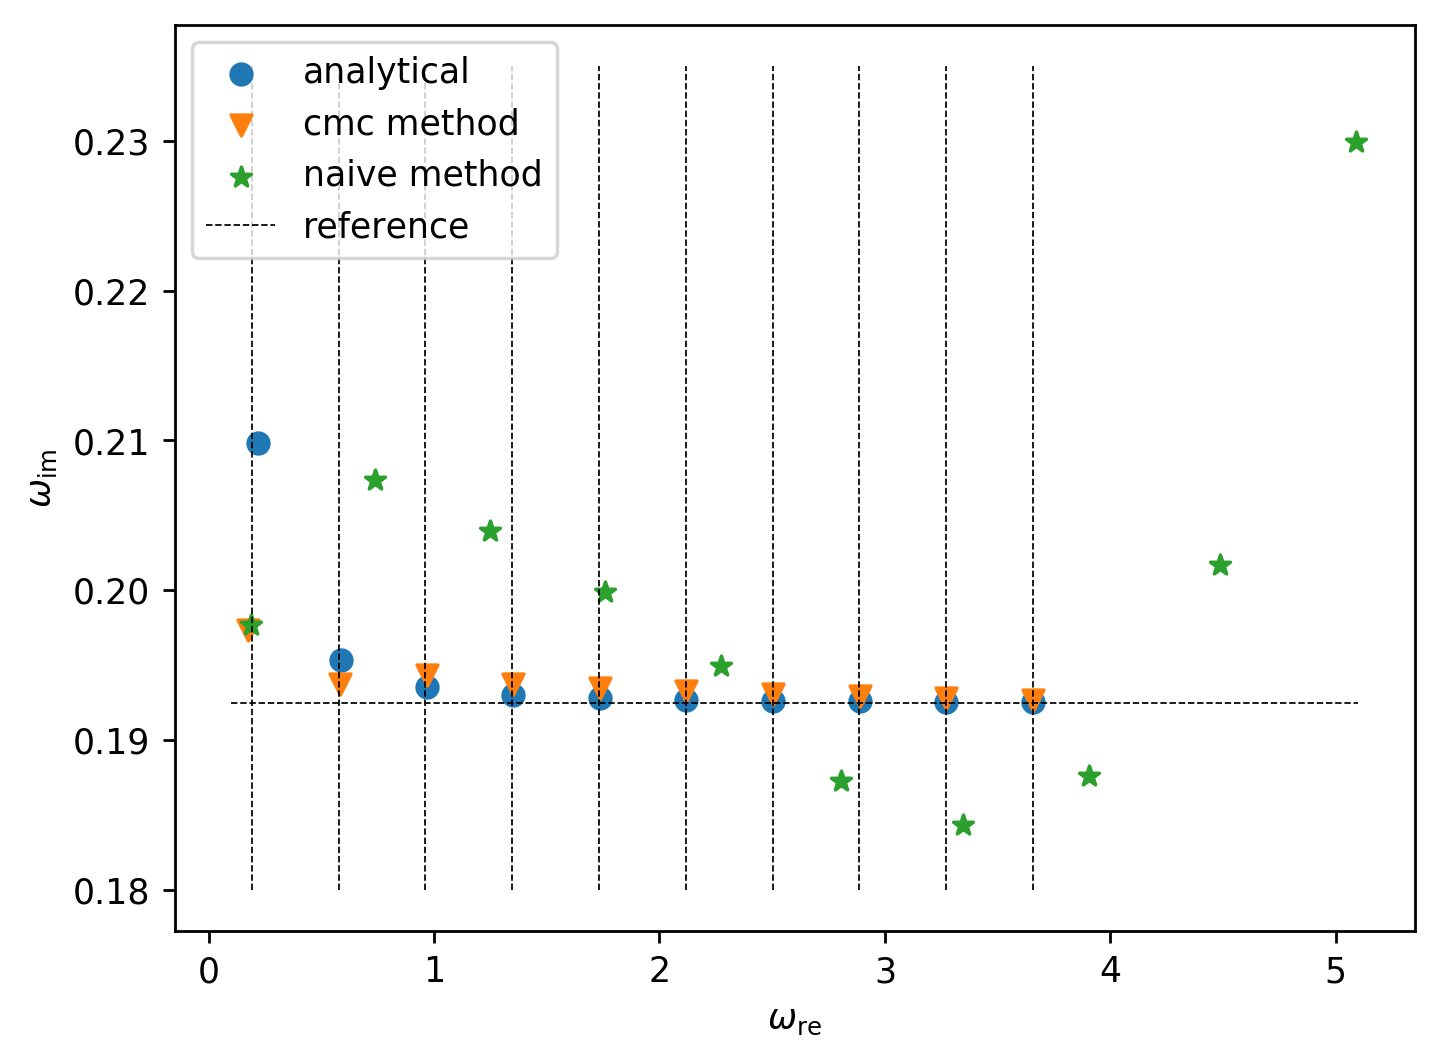

In [120]:


o_cmc = np.array([[0.16988808, 0.25297392],
       [0.58184271, 0.19363056],
       [0.96735248, 0.19431127],
       [1.35070547, 0.19373201],
       [1.73483633, 0.19343977],
       [2.11923754, 0.19323309],
       [2.50378932, 0.19306627],
       [2.8884373 , 0.19291792],
       [3.27315084, 0.19277746],
       [3.65791043, 0.19264195]])

o_cmc2 = np.array([[0.17722632, 0.19736117],
       [0.58177655, 0.19371857],
       [0.96735248, 0.19431127],
       [1.35070547, 0.19373201],
       [1.73483634, 0.19343975],
       [2.11923754, 0.19323309],
       [2.50378932, 0.19306627],
       [2.8884373 , 0.19291792],
       [3.27315084, 0.19277746],
       [3.65791043, 0.19264195]])

o_fir = np.array([[0.33039884, 0.48335647],
       [0.74006244, 0.20624979],
       [1.24793124, 0.20381534],
       [1.75820847, 0.1996762 ],
       [2.27526353, 0.19389688],
       [2.80366567, 0.188109  ],
       [3.34738551, 0.18484306],
       [3.90883674, 0.18837681],
       [4.48948685, 0.202723  ],
       [5.09314682, 0.22997293]])

o_fir2 = np.array([[0.18807691, 0.19764118],
       [0.73990547, 0.20733986],
       [1.24756609, 0.2039465 ],
       [1.7578476 , 0.19987194],
       [2.27492935, 0.19492927],
       [2.80427901, 0.18723748],
       [3.34535692, 0.18431268],
       [3.90697429, 0.18757907],
       [4.48772456, 0.2016672 ],
       [5.08811488, 0.22994991]])

o_mat = np.array([[ 0.22090988, -0.20979143],
       [ 0.58587227, -0.19531998],
       [ 0.96728774, -0.19351755],
       [ 1.35073247, -0.19299926],
       [ 1.73483128, -0.19278338],
       [ 2.11922364, -0.19267356],
       [ 2.50377306, -0.19261024],
       [ 2.88841637, -0.19257045],
       [ 3.2731203 , -0.19254383],
       [ 3.65786564, -0.19252515]])

plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.scatter(o_mat[:,0], -o_mat[:,1], label='analytical')
#plt.scatter(o_cmc[:,0], o_cmc[:,1], label='cmc method', marker='v')
plt.scatter(o_cmc2[:,0], o_cmc2[:,1], label='cmc method', marker='v')
#plt.scatter(o_fir[:,0], o_fir[:,1], label='naive method', marker='*')
plt.scatter(o_fir2[:,0], o_fir2[:,1], label='naive method', marker='*')

plt.hlines(y=1/(3*np.sqrt(3)), xmin=0.1, xmax=5.1, linestyles='dashed', linewidth=0.5, label='reference')

for i in range(10):
    plt.vlines(x=(1+2*i)/(3*np.sqrt(3)), ymin=0.18, ymax=0.235, linestyles='dashed', linewidth=0.5)

plt.legend()
plt.xlabel('$\omega_\mathrm{re}$')
plt.ylabel('$\omega_\mathrm{im}$')
#plt.grid(True)

plt.savefig('figures/QNM_comp3.jpg')
plt.show()

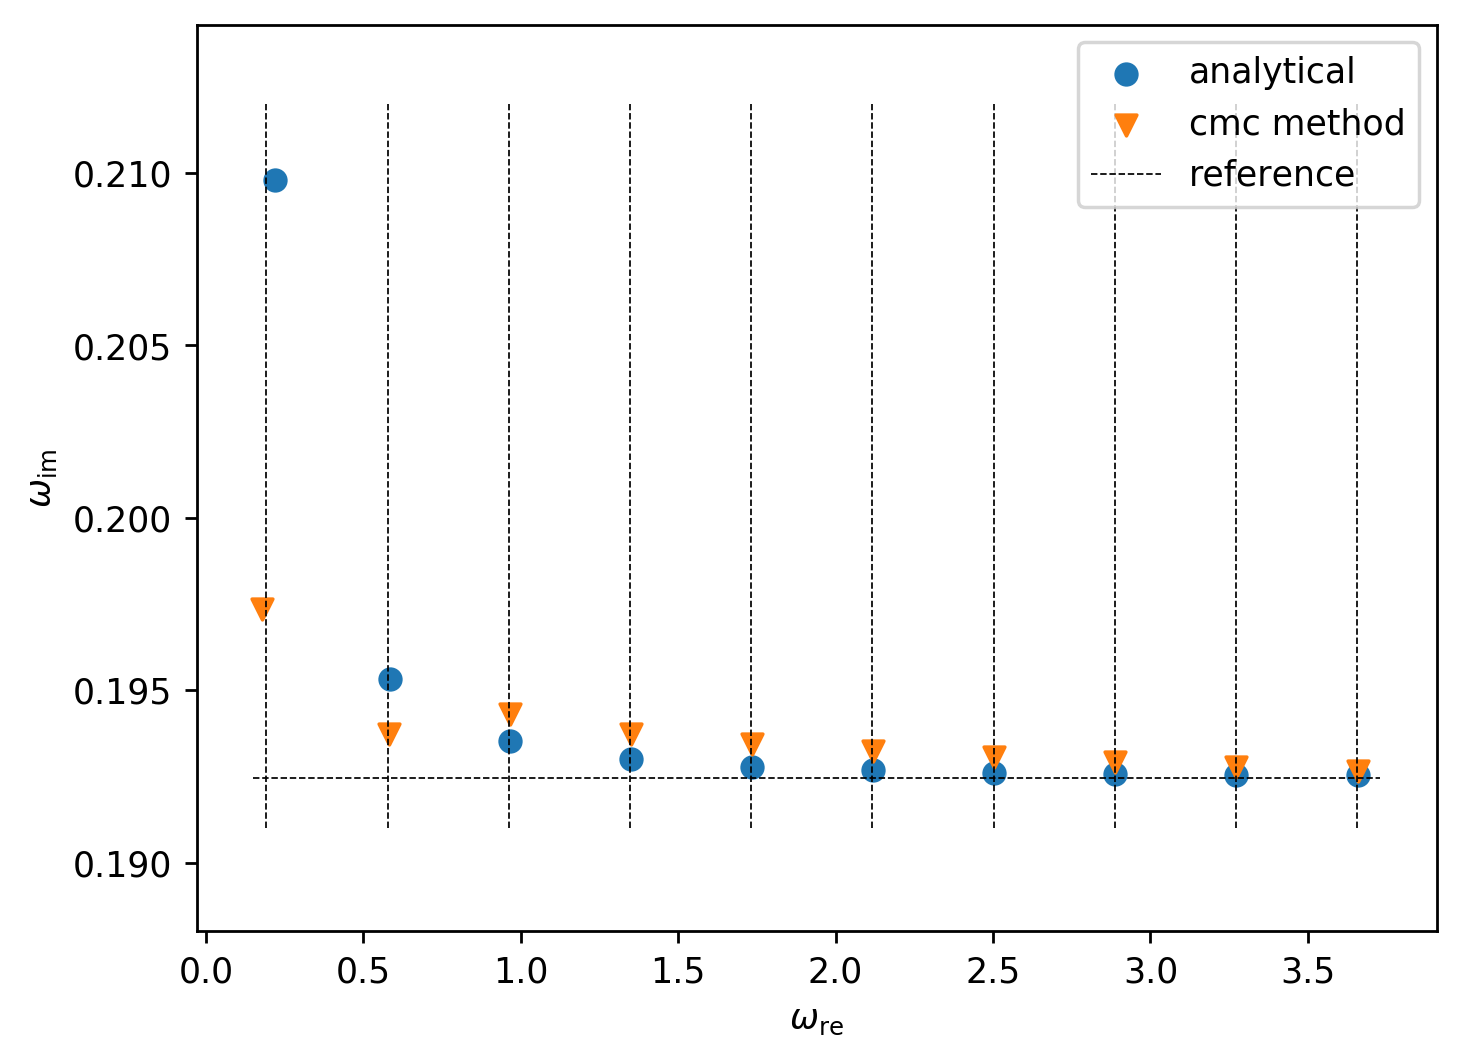

In [124]:
plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.scatter(o_mat[:,0], -o_mat[:,1], label='analytical')
plt.scatter(o_cmc2[:,0], o_cmc2[:,1], label='cmc method', marker='v')
plt.xlabel('$\omega_\mathrm{re}$')
plt.ylabel('$\omega_\mathrm{im}$')
#plt.grid(True)

plt.hlines(y=1/(3*np.sqrt(3)), xmin=0.15, xmax=3.73, linestyles='dashed', linewidth=0.5, label='reference')

for i in range(10):
    plt.vlines(x=(1+2*i)/(3*np.sqrt(3)), ymin=0.191, ymax=0.212, linestyles='dashed', linewidth=0.5)
    

plt.legend()

plt.savefig('figures/QNM_comp2.jpg')
plt.show()

# Phi mit peak bei r=2m für t=0

In [22]:
phi, t, r = imp(5, 'phi_cmc2')

(100000, 250, 5)


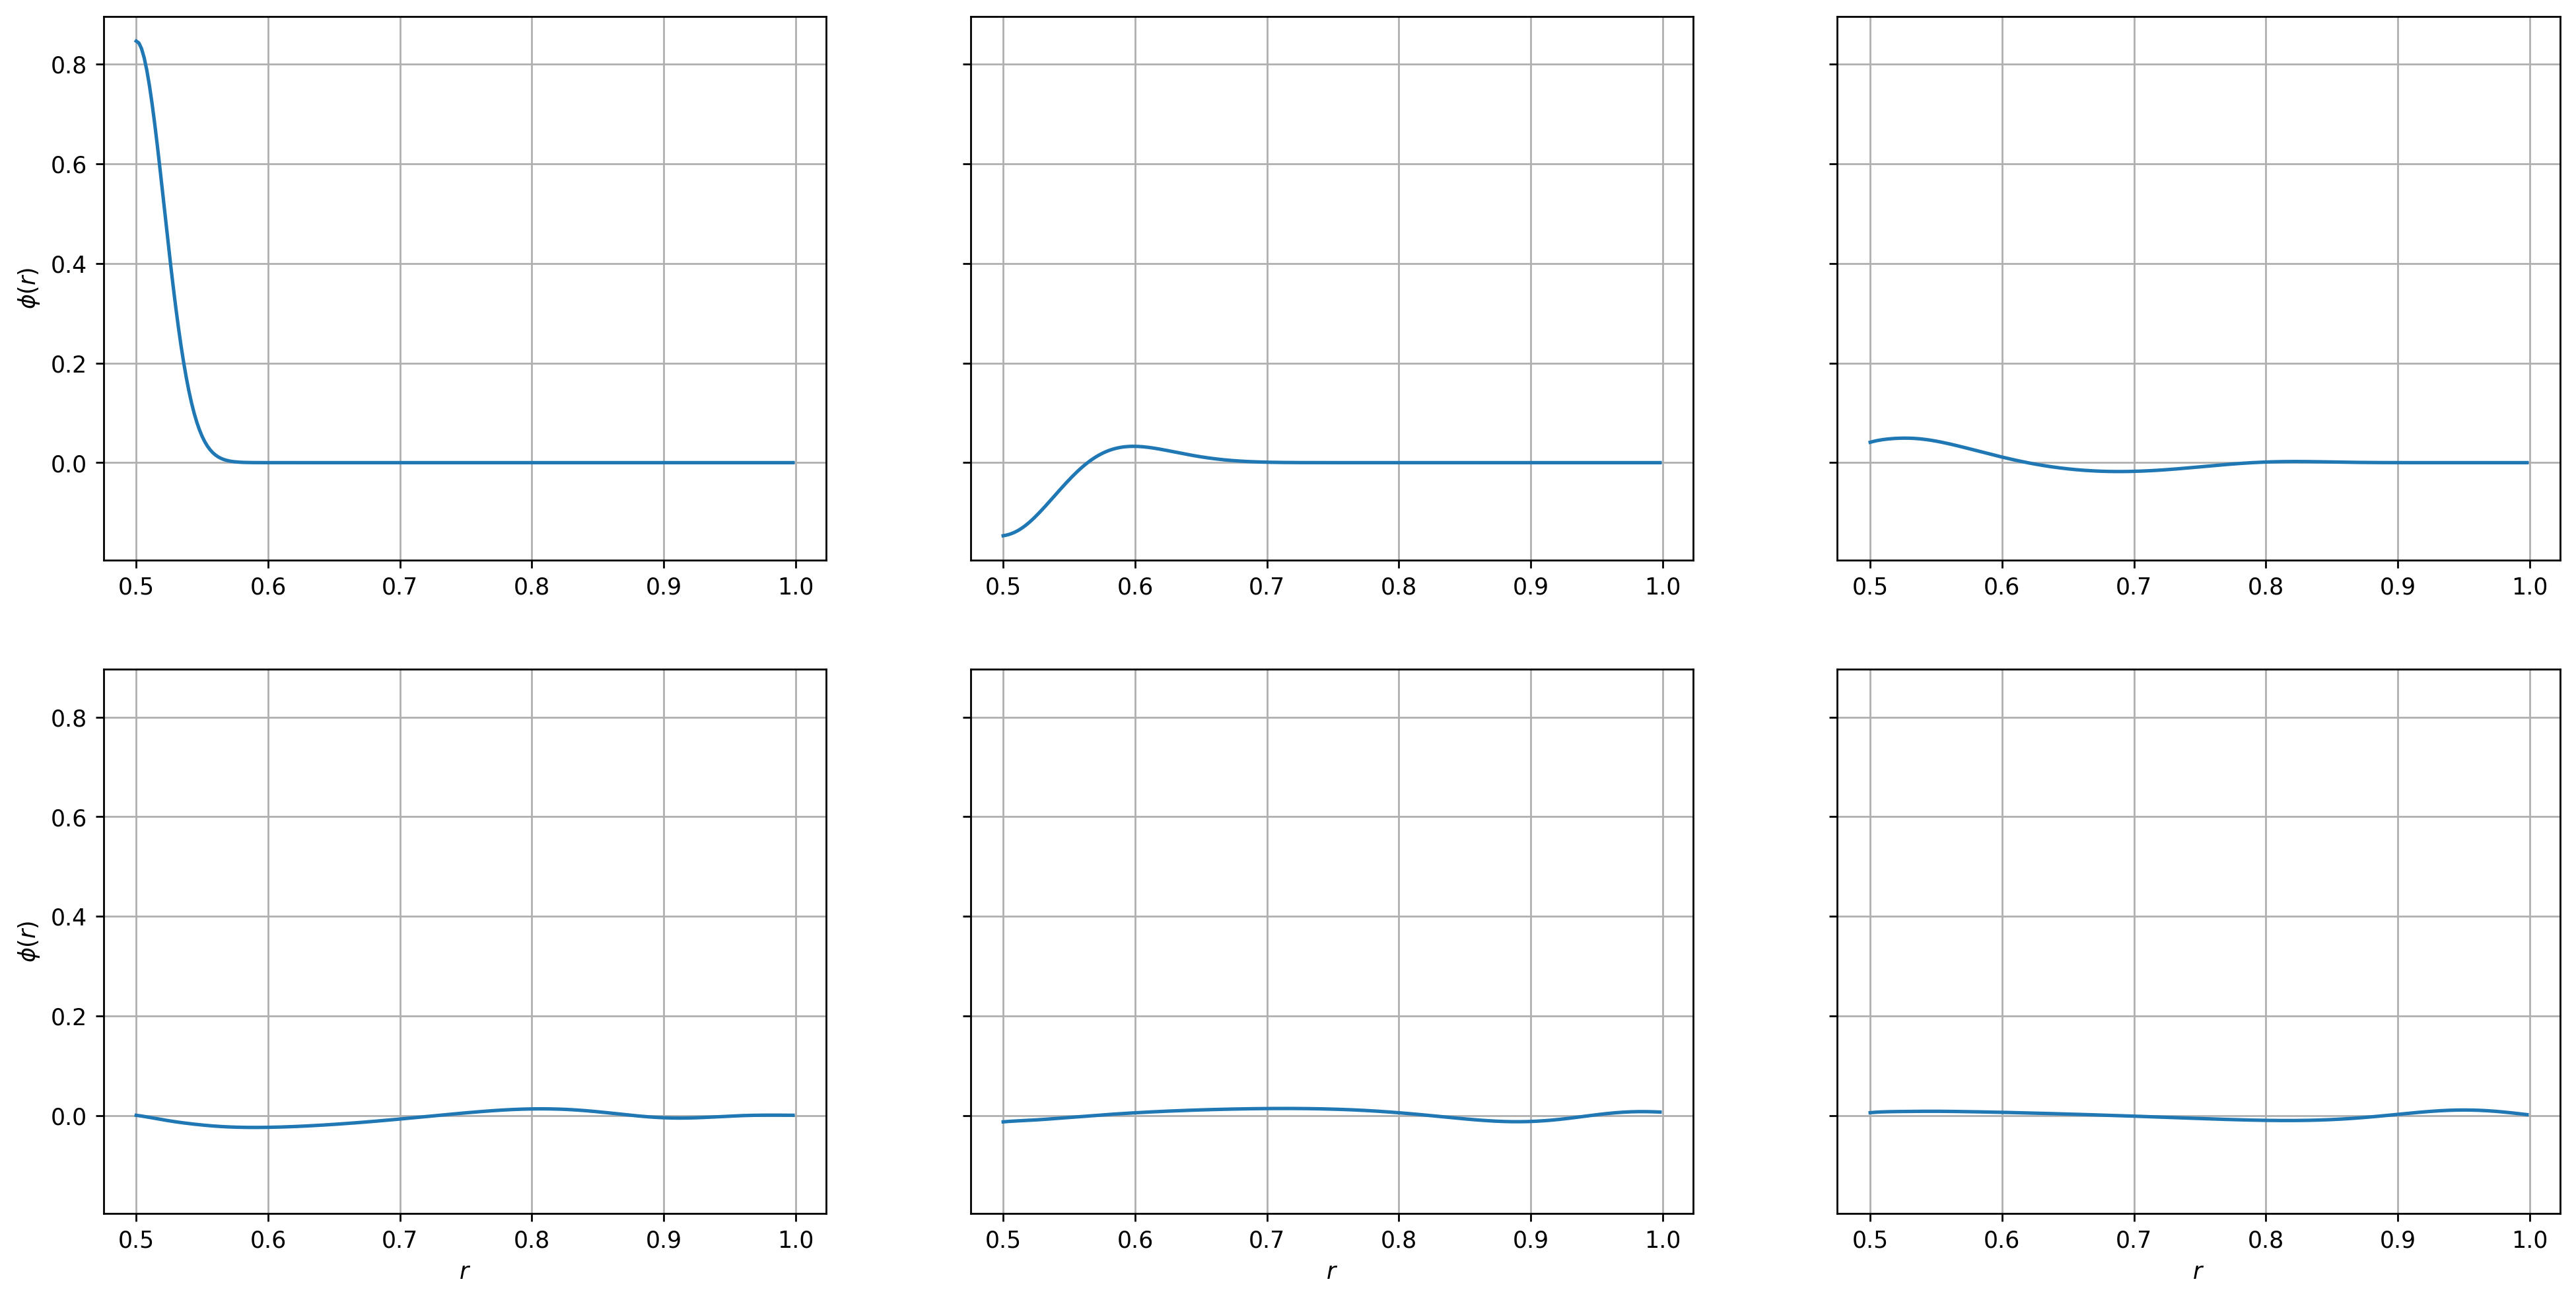

In [23]:
print(phi.shape)

phip = phi[:,:,4]

plt.figure(figsize=(3*6.4, 2*4.8), dpi=250)

ax1 = plt.subplot(231)
plt.plot(r, phip[0*phi.shape[0],:])
plt.ylabel('$\phi(r)$')
plt.grid(True)

ax2 = plt.subplot(232, sharey=ax1)
plt.plot(r, phip[int(0.025*phi.shape[0]),:])
plt.setp(ax2.get_yticklabels(), visible=False)
#ax2.set_yticks([])
plt.grid(True)

ax3 = plt.subplot(233, sharey=ax1)
plt.plot(r, phip[int(0.05*phi.shape[0]),:])
plt.setp(ax3.get_yticklabels(), visible=False)
plt.grid(True)

ax4 = plt.subplot(234, sharey=ax1)
plt.plot(r, phip[int(0.075*phi.shape[0]),:])
plt.ylabel('$\phi(r)$')
plt.xlabel('$r$')
plt.grid(True)

ax5 = plt.subplot(235, sharey=ax1)
plt.plot(r, phip[int(0.1*phi.shape[0]),:])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.xlabel('$r$')
plt.grid(True)

ax6 = plt.subplot(236, sharey=ax1)
plt.plot(r, phip[int(0.125*phi.shape[0]),:])
plt.setp(ax6.get_yticklabels(), visible=False)
plt.xlabel('$r$')

plt.grid(True)

#plt.savefig('figures/QNM_evol_cmc.jpg')
plt.show()

In [12]:
con = np.load('phi_cmc2/conv.npy')
t_con = np.load('phi_cmc2/t_conv.npy')

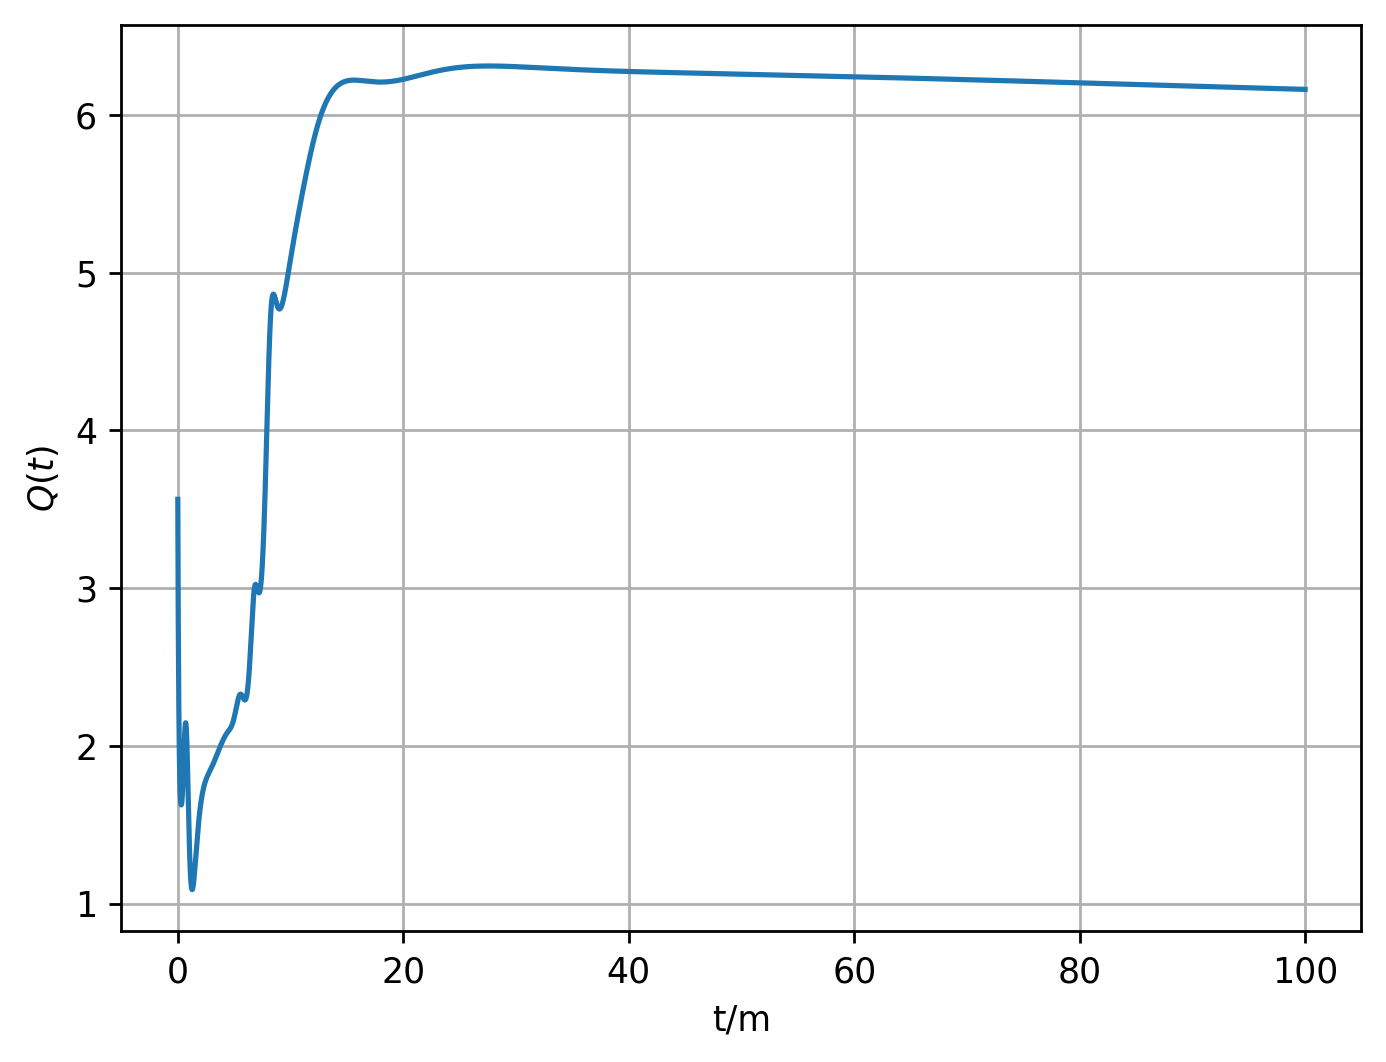

In [14]:
# dr = 0.02, l=0
plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.plot(t_con, con)
#plt.ylim(-0.2, 4.2)
plt.grid(True)

plt.xlabel('t/m')
plt.ylabel('$Q(t)$')

plt.savefig('figures/conv_cmc.jpg')
plt.show()

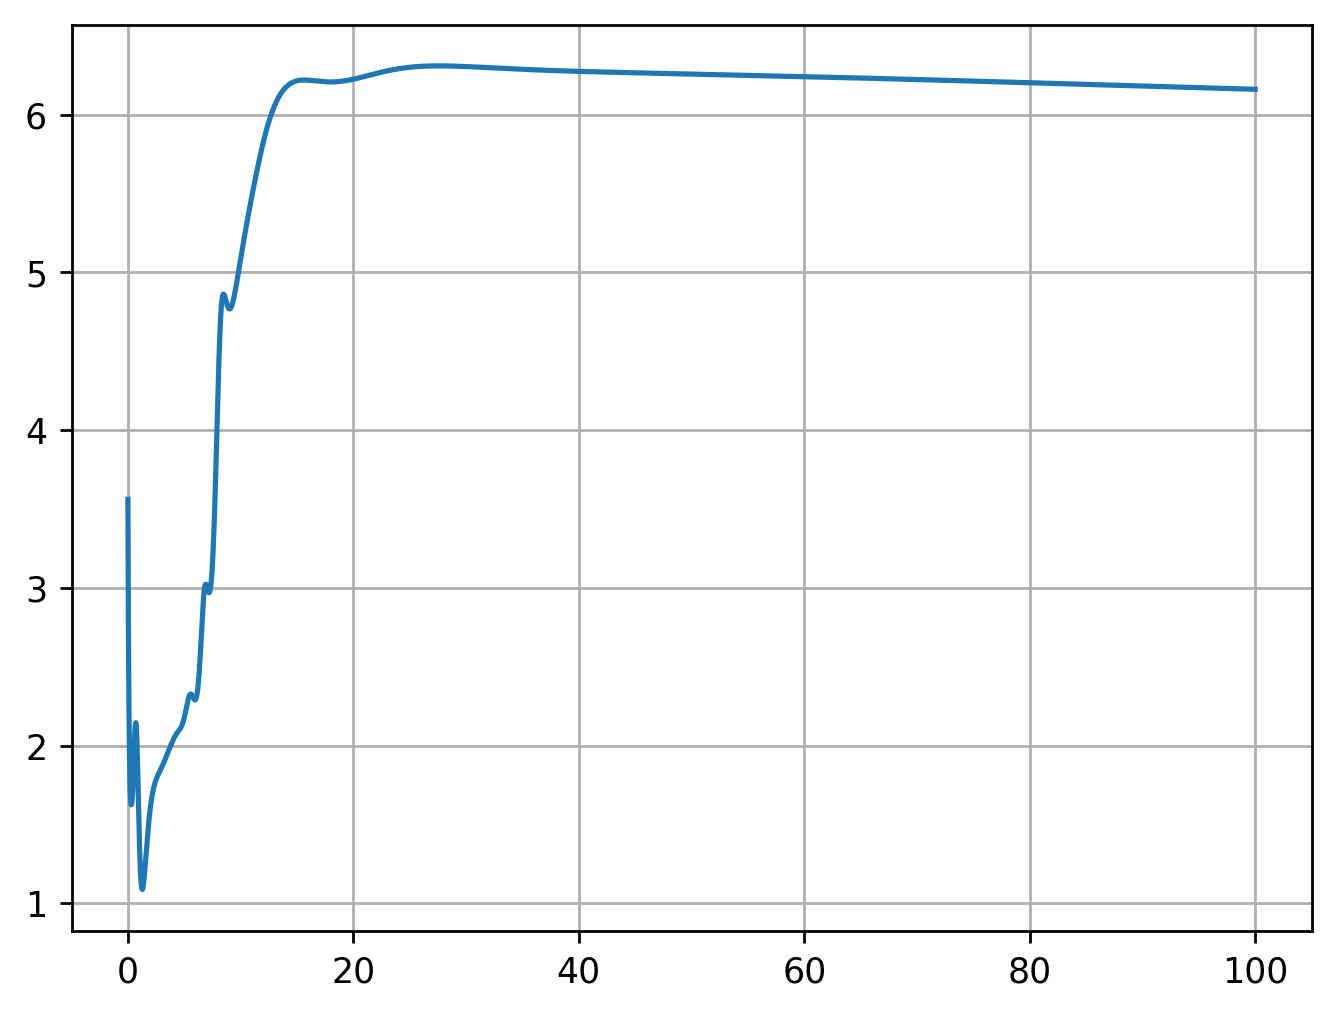

In [49]:
# dr = 0.02, l=0
plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.plot(t_con, con)
#plt.ylim(-0.2, 4.2)
plt.grid(True)

plt.savefig('figures/conv_cmc.jpg')
plt.show()

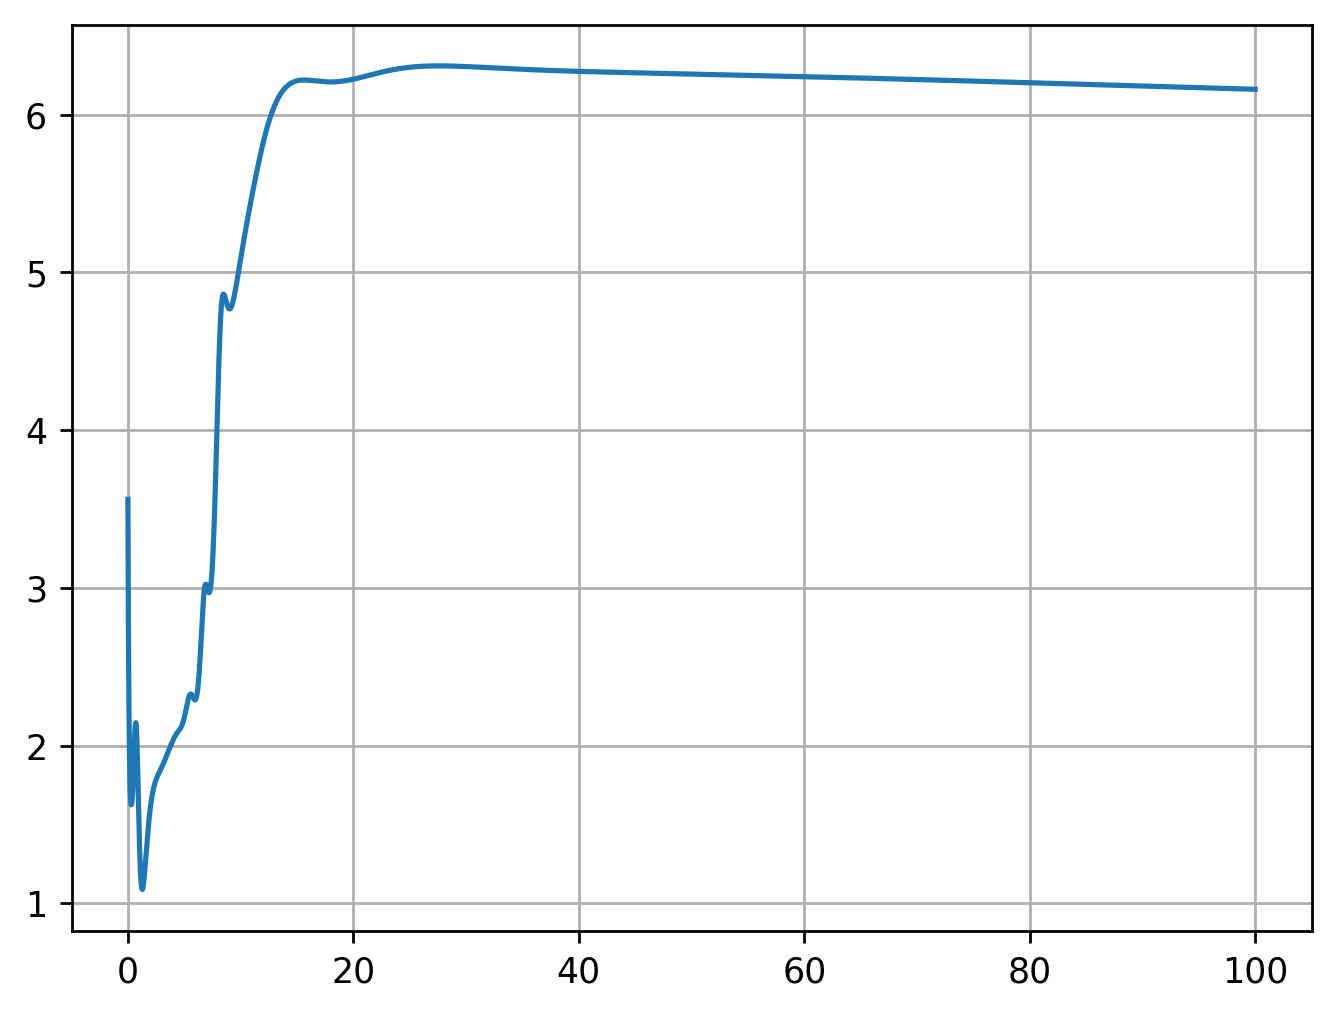

In [53]:
# dr = 0.01
plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.plot(t_con, con)
#plt.ylim(-0.2, 4.2)
plt.grid(True)

plt.savefig('figures/conv_cmc.jpg')
plt.show()

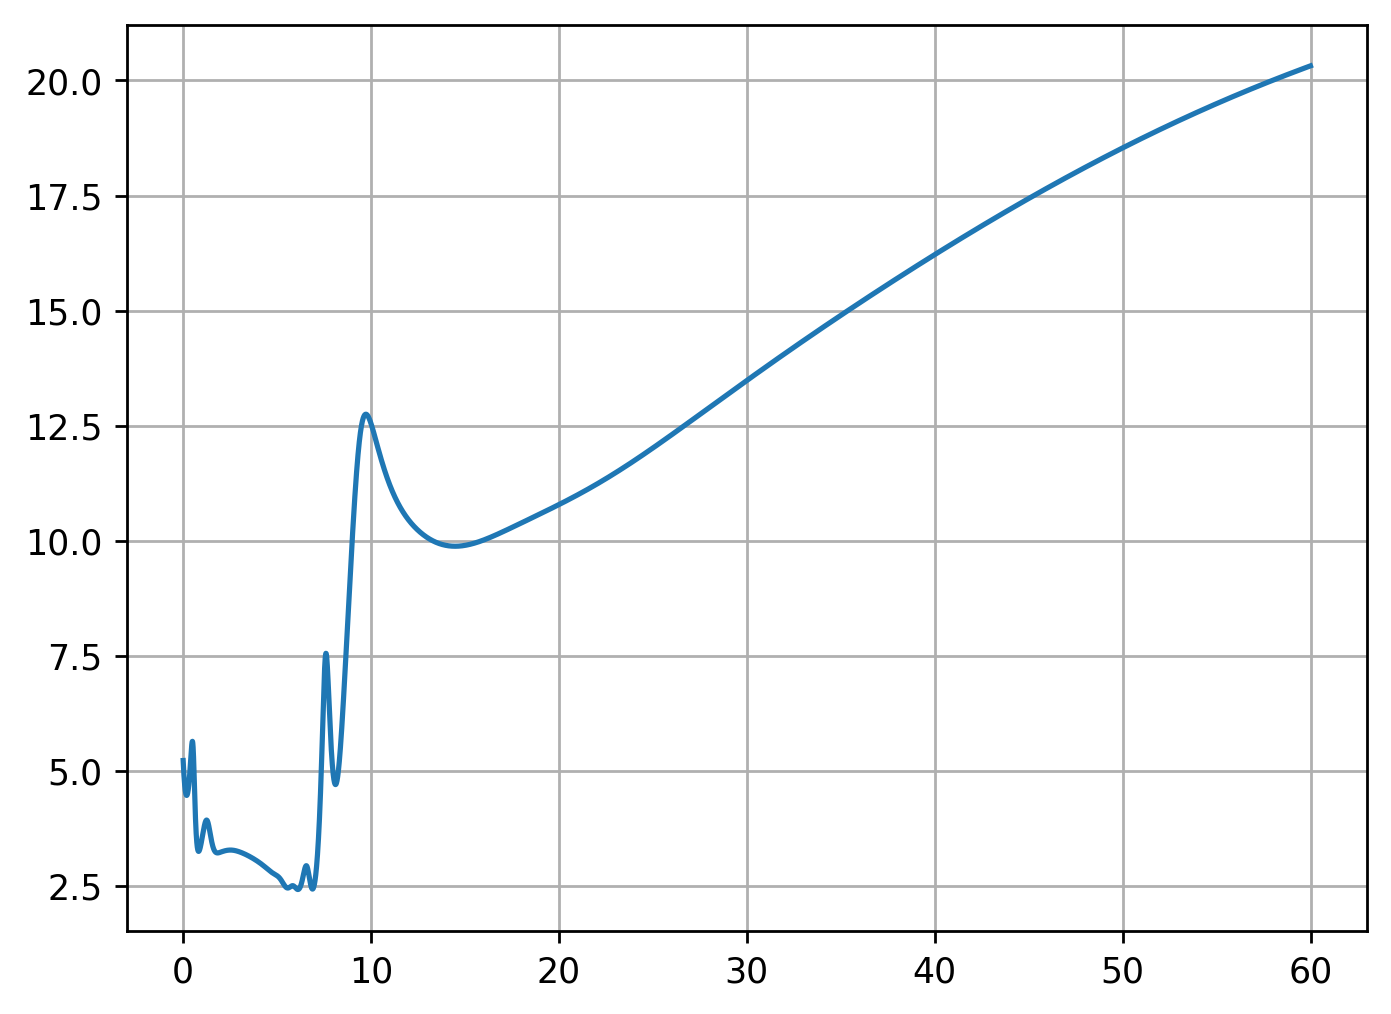

In [40]:
# dr = 0.008
plt.figure(figsize=(6.4, 4.8), dpi=250)

plt.plot(t_con, con)
#plt.ylim(-0.2, 4.2)
plt.grid(True)

#plt.savefig('figures/conv_cmc.jpg')
plt.show()

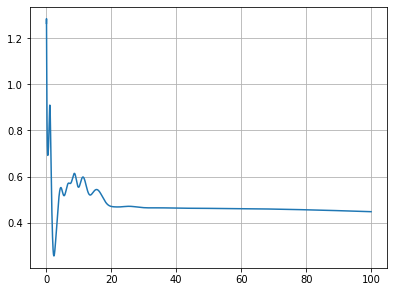

In [44]:
# dr = 0.04
plt.figure(figsize=(6.4, 4.8))

plt.plot(t_con, con)
#plt.ylim(-0.2, 4.2)
plt.grid(True)

#plt.savefig('figures/conv_cmc.jpg')
plt.show()